40/40 [==============================] - 0s
cost 0.00313670327887
W [[ 0.4922711]] b [ 1.99950218]


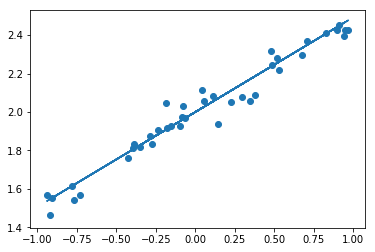

In [23]:
#线性回归
import numpy as np
np.random.seed(1337) #可重复性
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# X=np.linspace(-1,1,200)
# np.random.shuffle(X)
# Y=0.5*X+2+np.random.normal(0,0.05,(200,))

# plt.scatter(X,Y)
# plt.show()

#############################################

# X_train,Y_train=X[:160],Y[:160]
# X_test,Y_test=X[160:],Y[160:]


# model=Sequential()

# model.add(Dense(output_dim=1,input_dim=1))

# model.compile(loss='mse',
#              optimizer='sgd')

# for step in range(301):
#     cost=model.train_on_batch(X_train,Y_train)
#     if step%100==0:
#         print('train cost',cost)
        
###save model
   
# model.save('my_model.h5')
        
# ##delete model
# del model

# ## load

from keras.models import load_model 
model=load_model('my_model.h5')

cost=model.evaluate(X_test,Y_test,batch_size=40)
print('cost',cost)

W,b=model.layers[0].get_weights()
print('W',W,'b',b)
Y_pred=model.predict(X_test)
plt.scatter(X_test,Y_test)

plt.plot(X_test,Y_pred)
plt.show()





In [24]:
# import os
# os.environ['KERAS_BACKEND']='theano'

import numpy as np
np.random.seed(1337)
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import RMSprop

(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],-1)/255.
X_test=X_test.reshape(X_test.shape[0],-1)/255.
y_train=np_utils.to_categorical(y_train,num_classes=10)
y_test=np_utils.to_categorical(y_test,num_classes=10)

model=Sequential([
    Dense(32,input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
    
])

rmsprop=RMSprop(lr=0.001,rho=0.9,epsilon=1e-08,decay=0.0)

model.compile(
optimizer=rmsprop,
loss='categorical_crossentropy',
metrics=['accuracy']
)

model.fit(X_train,y_train,nb_epoch=2,batch_size=32)

loss,accuracy=model.evaluate(X_test,y_test)
print('loss',loss)
print('accu',accuracy)







D:\ana\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/2
60000/60000 [==============================] - 3s - loss: 0.3432 - acc: 0.9046     
Epoch 2/2
 8704/10000 [=========================>....] - ETA: 0sloss 0.173951514292
accu 0.9513


In [91]:
#cnn for mnist
import numpy as np
np.random.seed(1337)
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Convolution2D,MaxPooling2D,Flatten
from keras.optimizers import Adam

(X_train,y_train),(X_test,y_test)=mnist.load_data()
#reshape 不明白
X_train=X_train.reshape(-1,1,28,28)
X_test=X_test.reshape(-1,1,28,28)
y_train=np_utils.to_categorical(y_train,num_classes=10)
y_test=np_utils.to_categorical(y_test,num_classes=10)

model=Sequential()

model.add(Convolution2D(
    nb_filter=32,
    nb_row=5,
    nb_col=5,
    border_mode='same',
    input_shape=(1,28,28),
    
))

model.add(Activation('relu'))

model.add(MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2),
    border_mode='same',
))

################
model.add(Convolution2D(64,5,5,border_mode='same'))

model.add(Activation('relu'))

model.add(MaxPooling2D(
    pool_size=(2,2),
    border_mode='same',
))



############################
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

#########################################

adam=Adam(lr=1e-4)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,nb_epoch=1,batch_size=32)

######################
loss,accuracy=model.evaluate(X_test,y_test)

print(loss)
print(accuracy)



D:\ana\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(input_shape=(1, 28, 28..., kernel_size=(5, 5), filters=32, padding="same")`
D:\ana\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")`
D:\ana\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), padding="same")`
D:\ana\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), padding="same")`
D:\ana\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
 9824/10000 [============================>.] - ETA: 0s0.137812646084
0.9603


In [138]:
#rnn classification
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense
from keras.optimizers import Adam

TIME_STEPS = 28     # same as the height of the image
INPUT_SIZE = 28     # same as the width of the image
BATCH_SIZE = 50
BATCH_INDEX = 0
OUTPUT_SIZE = 10
CELL_SIZE = 50
LR = 0.001



(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing
X_train = X_train.reshape(-1, 28, 28) / 255.      # normalize
X_test = X_test.reshape(-1, 28, 28) / 255.        # normalize
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

# build RNN model
model = Sequential()

# RNN cell
model.add(SimpleRNN(
    # for batch_input_shape, if using tensorflow as the backend, we have to put None for the batch_size.
    # Otherwise, model.evaluate() will get error.
    batch_input_shape=(None, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    output_dim=CELL_SIZE,
    unroll=True,
))

# output layer
model.add(Dense(OUTPUT_SIZE))
model.add(Activation('softmax'))

# optimizer
adam = Adam(LR)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# training
for step in range(4001):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch = X_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :, :]
    Y_batch = y_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :]
    cost = model.train_on_batch(X_batch, Y_batch)
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

    if step % 500 == 0:
        cost, accuracy = model.evaluate(X_test, y_test, batch_size=y_test.shape[0], verbose=False)
        print('test cost: ', cost, 'test accuracy: ', accuracy)


D:\ana\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(batch_input_shape=(None, 28,..., unroll=True, units=50)`


test cost:  2.40573239326 test accuracy:  0.0390999987721
test cost:  0.607616364956 test accuracy:  0.817799985409
test cost:  0.446700483561 test accuracy:  0.865599989891
test cost:  0.31988465786 test accuracy:  0.909200012684
test cost:  0.312125533819 test accuracy:  0.910700023174
test cost:  0.281159877777 test accuracy:  0.916999995708
test cost:  0.285826772451 test accuracy:  0.917599976063
test cost:  0.243148416281 test accuracy:  0.927100002766
test cost:  0.228335991502 test accuracy:  0.933499991894


D:\ana\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(50, 20, 1..., return_sequences=True, stateful=True, units=20)`


Training ------------


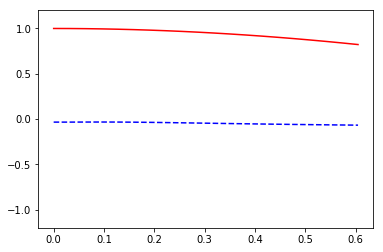

train cost:  0.509406


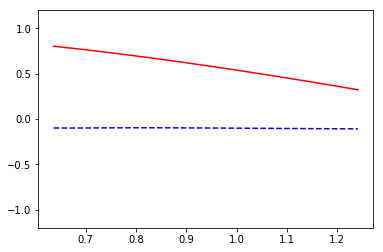

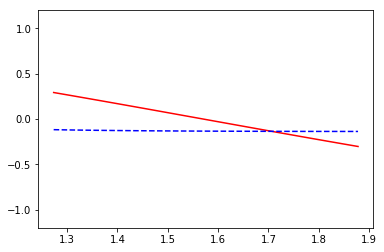

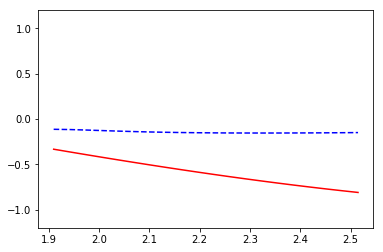

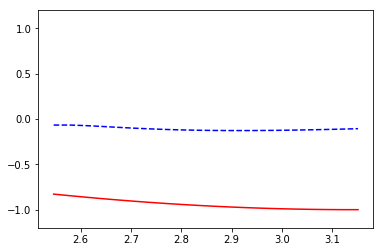

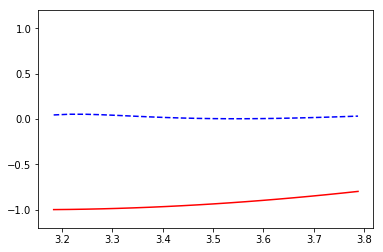

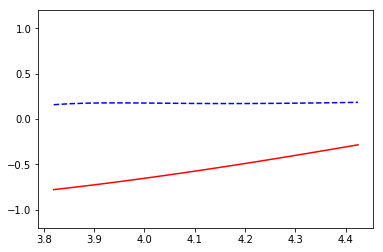

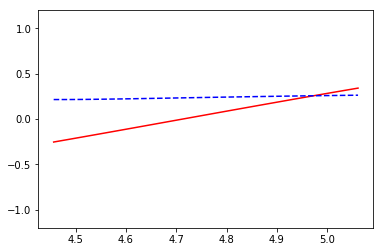

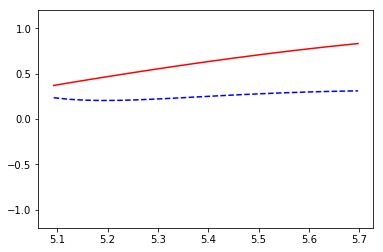

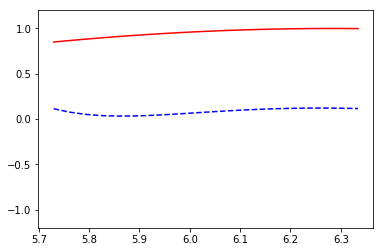

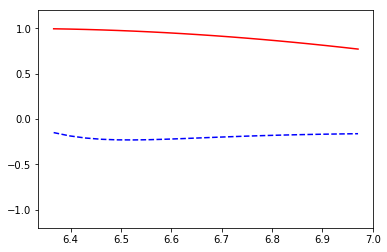

train cost:  0.359059


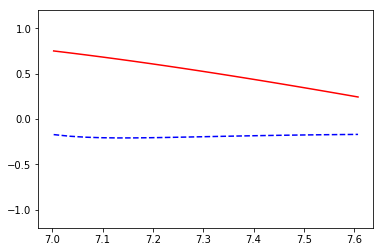

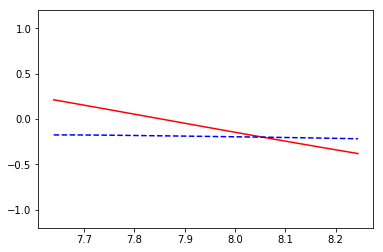

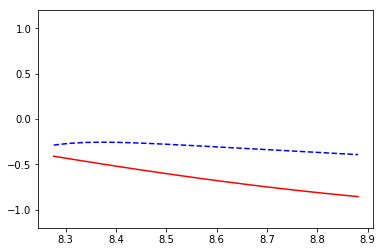

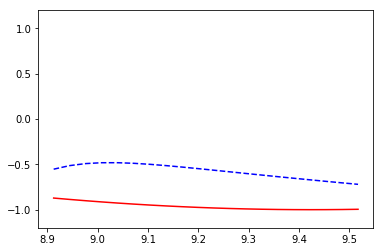

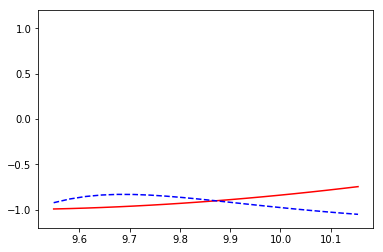

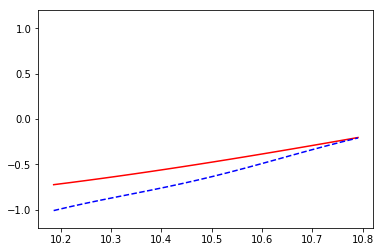

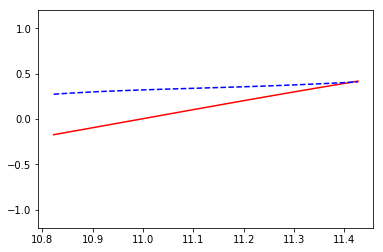

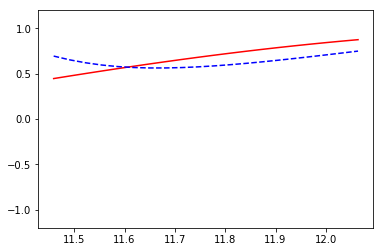

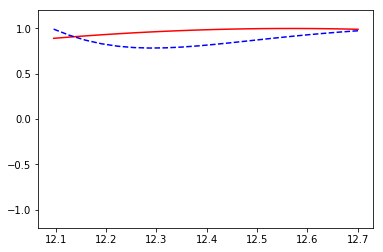

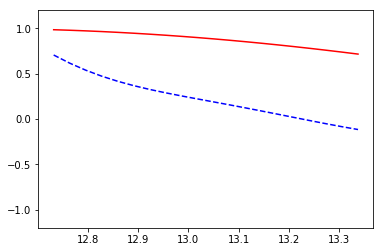

train cost:  0.0768567


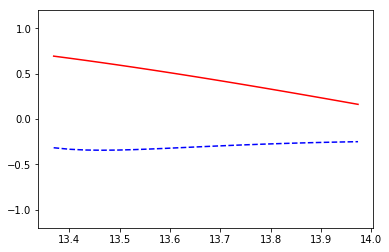

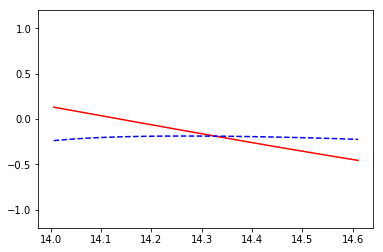

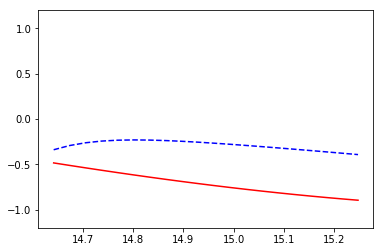

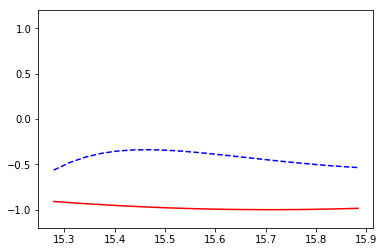

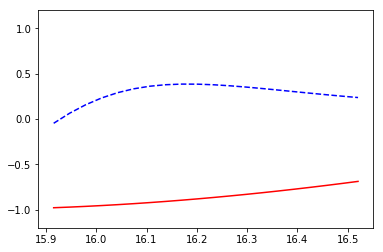

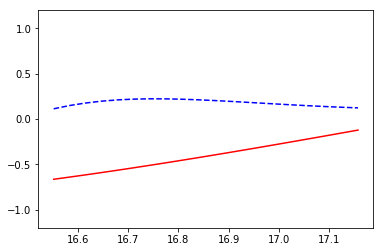

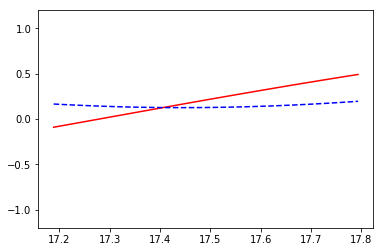

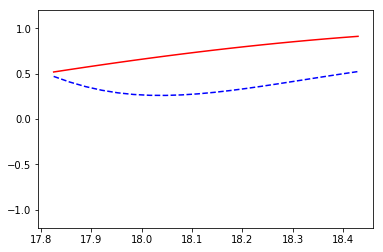

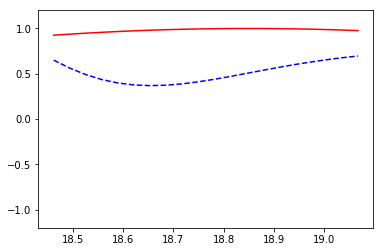

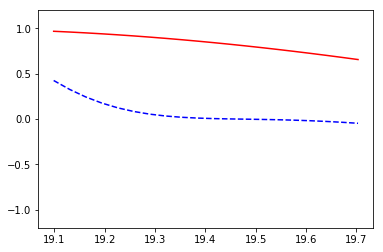

train cost:  0.141376


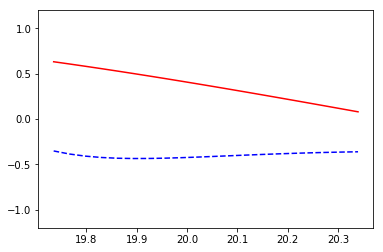

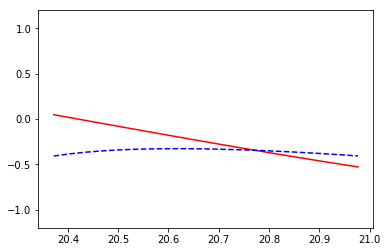

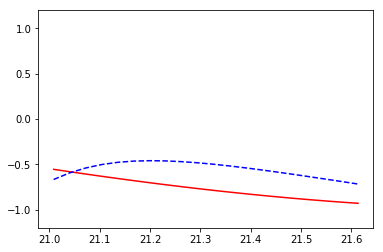

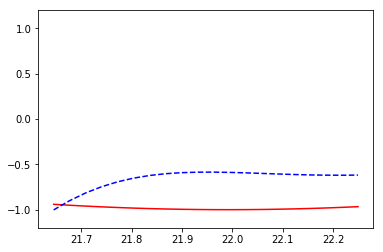

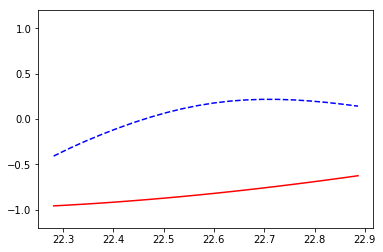

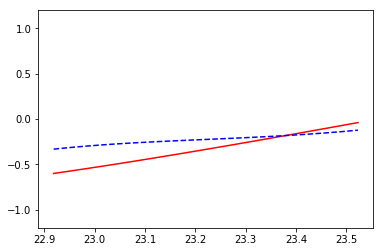

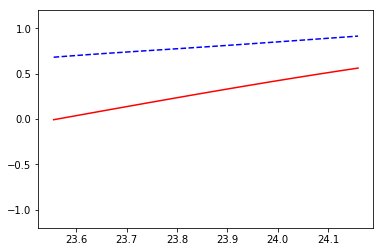

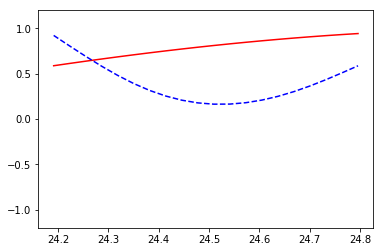

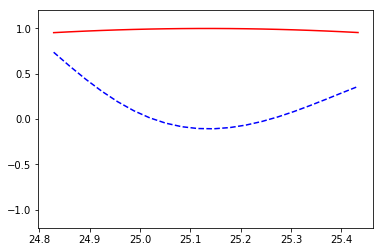

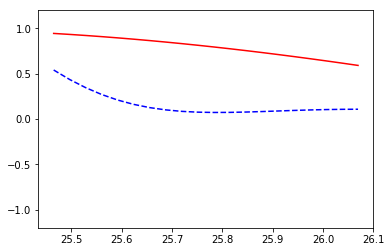

train cost:  0.0567132


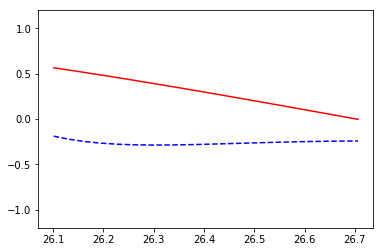

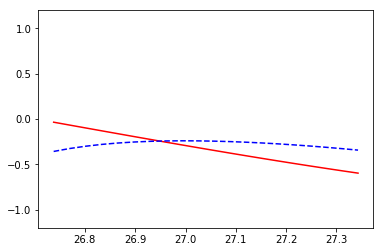

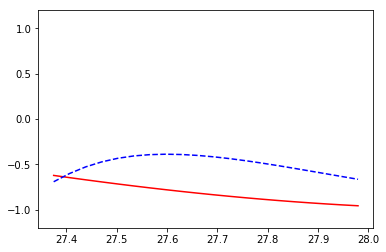

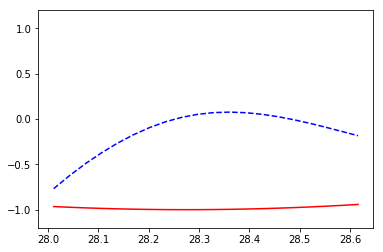

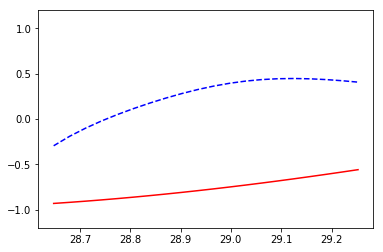

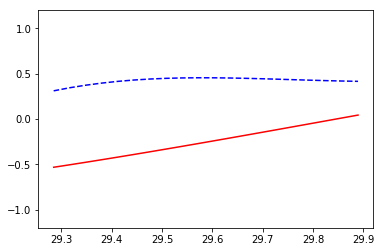

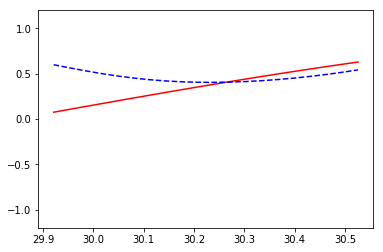

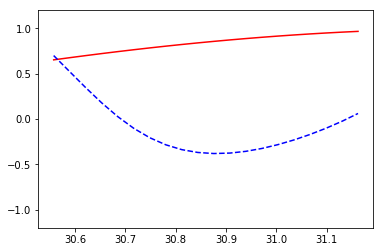

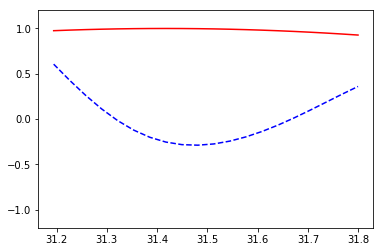

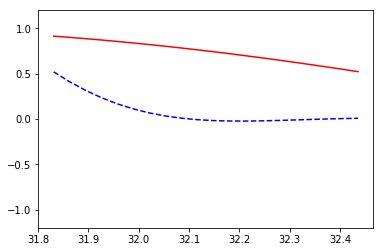

train cost:  0.0474642


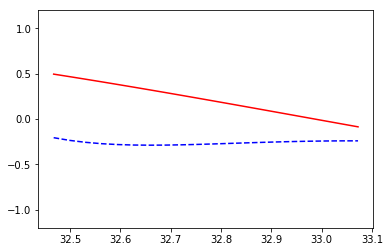

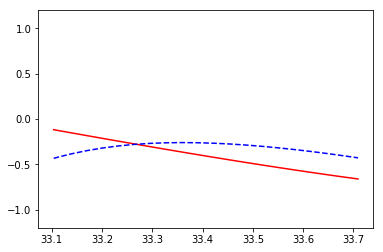

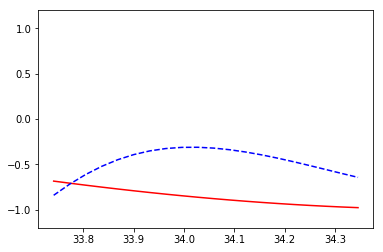

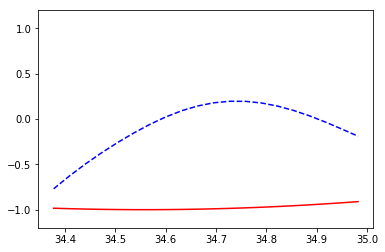

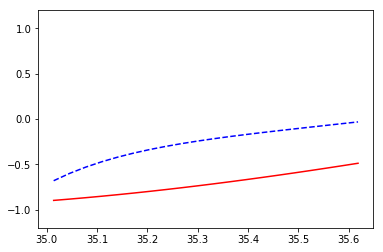

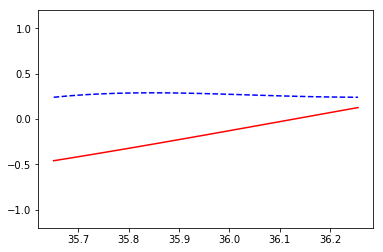

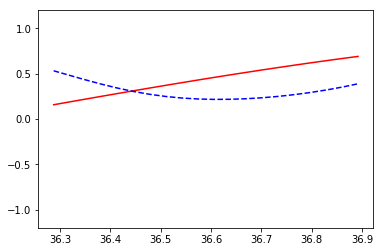

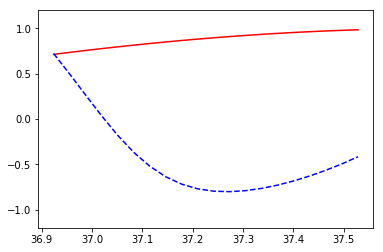

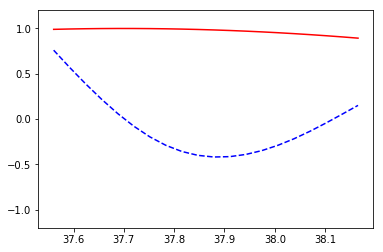

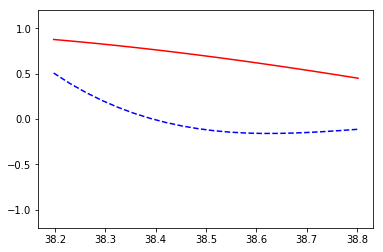

train cost:  0.0546101


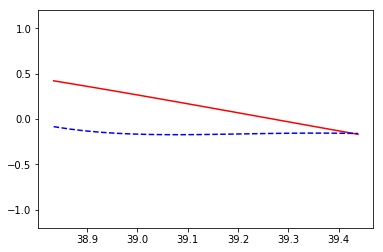

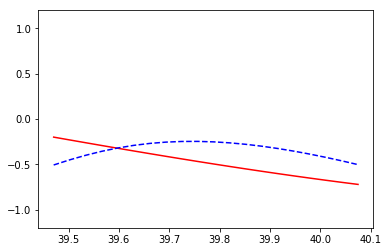

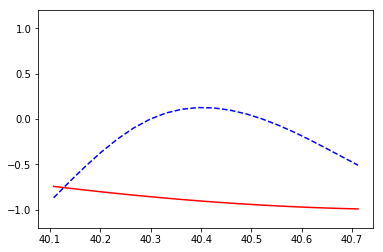

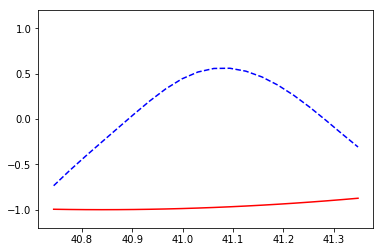

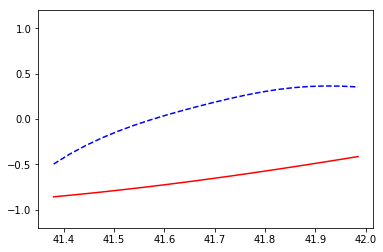

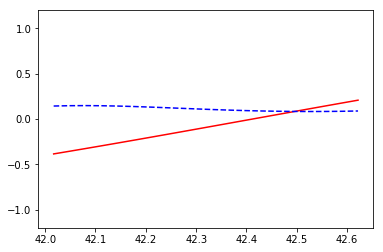

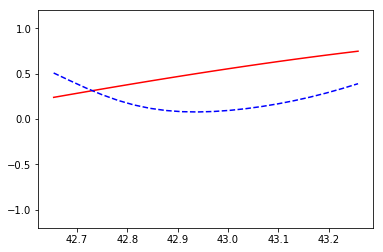

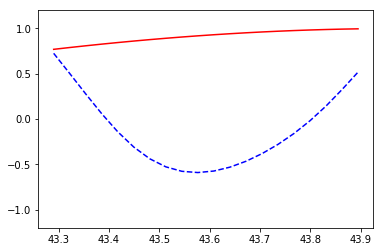

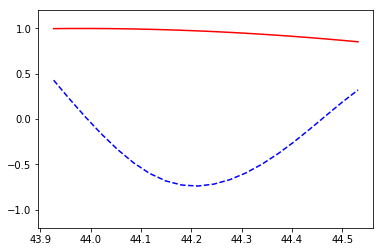

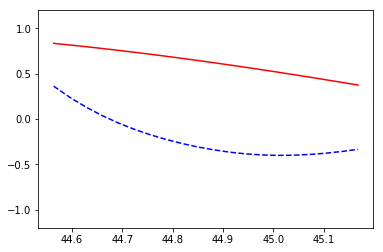

train cost:  0.0369258


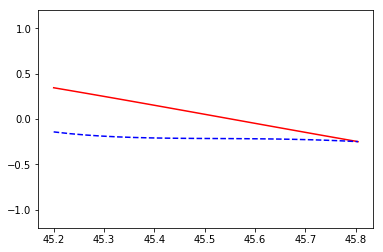

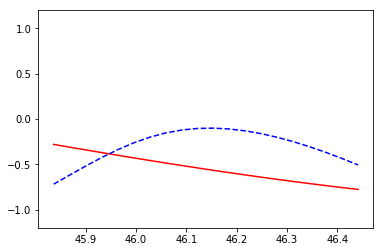

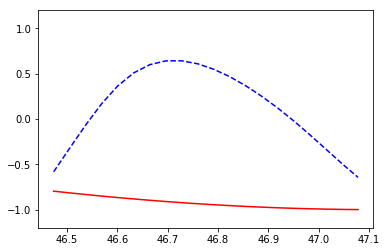

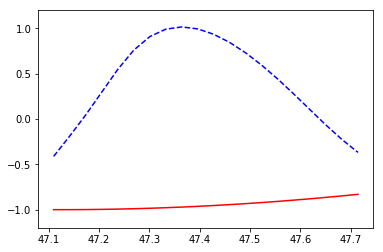

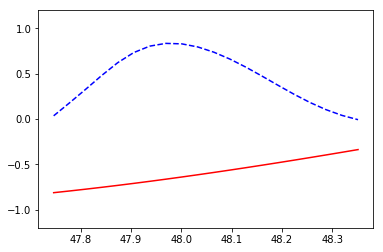

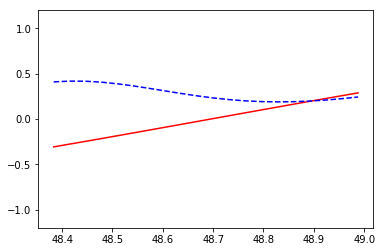

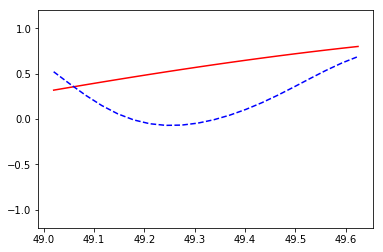

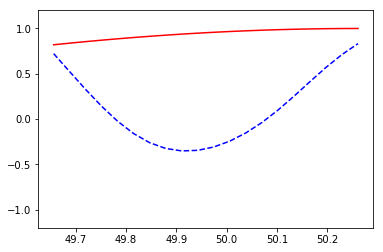

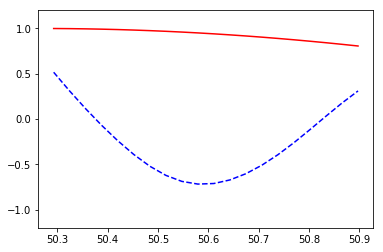

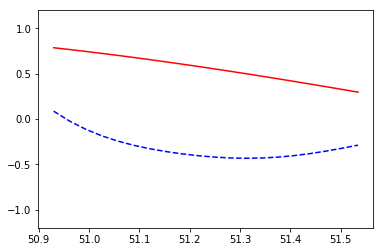

train cost:  0.0162952


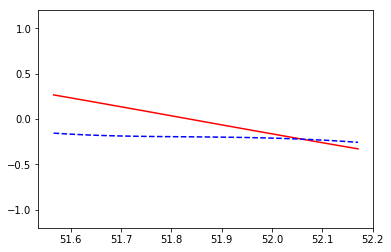

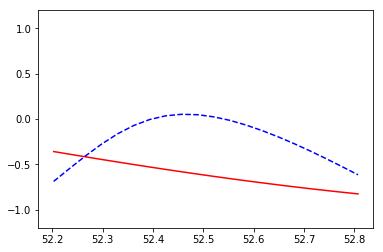

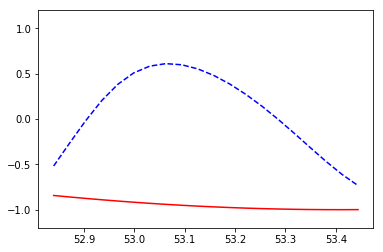

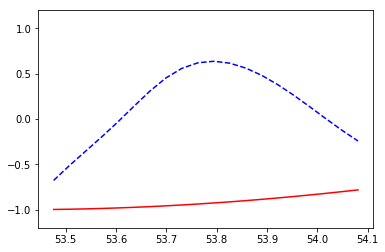

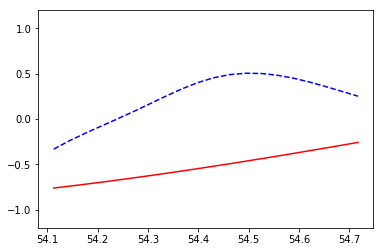

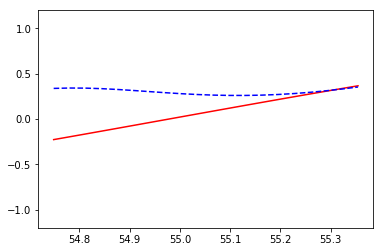

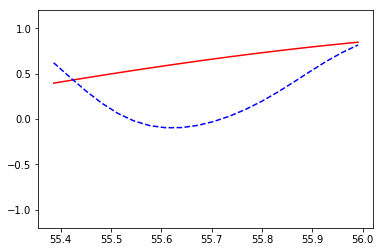

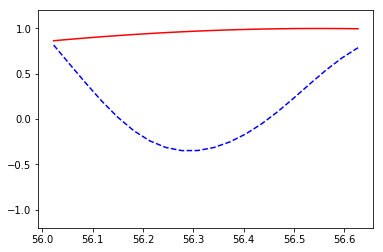

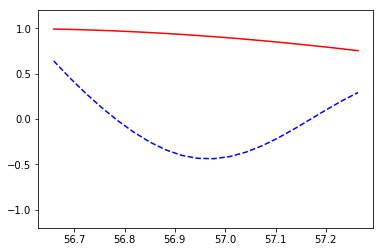

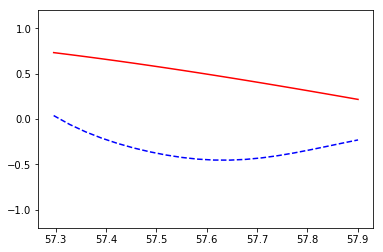

train cost:  0.0182579


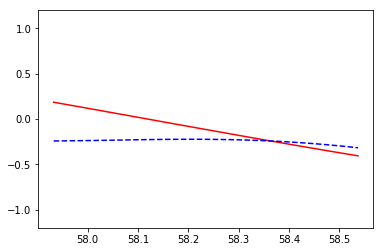

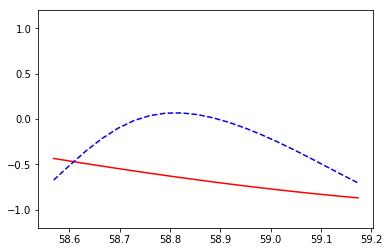

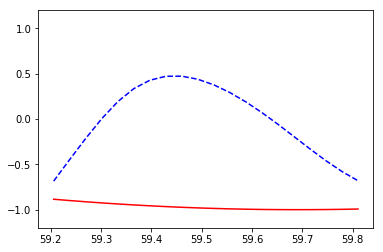

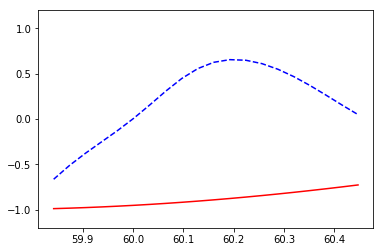

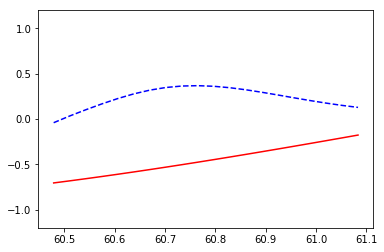

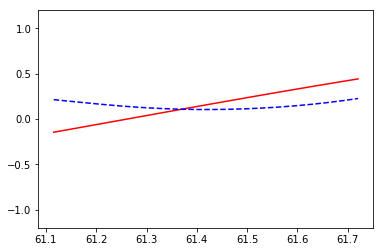

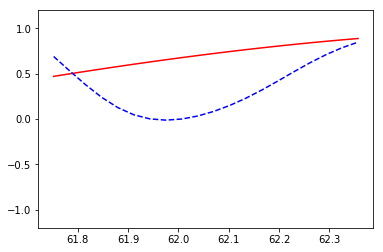

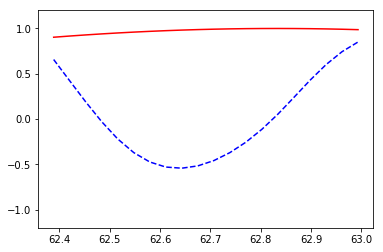

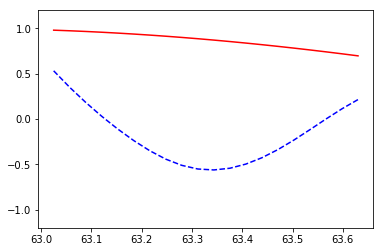

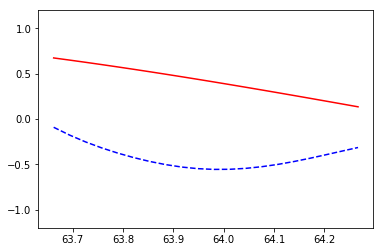

train cost:  0.017062


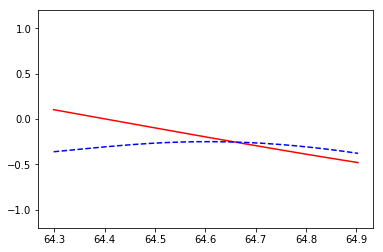

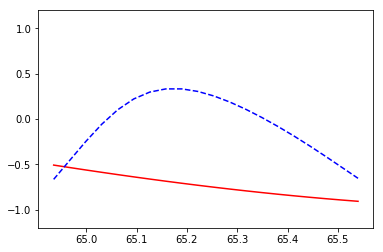

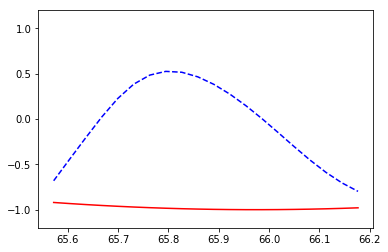

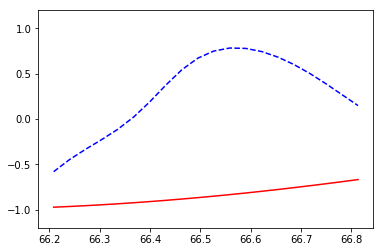

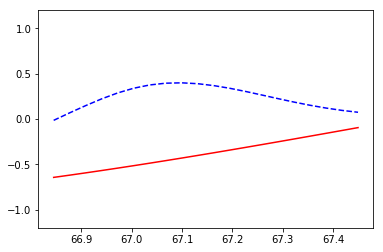

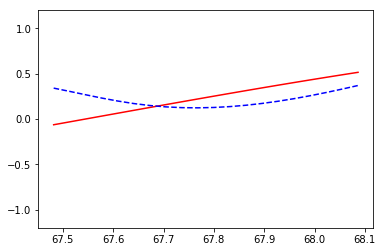

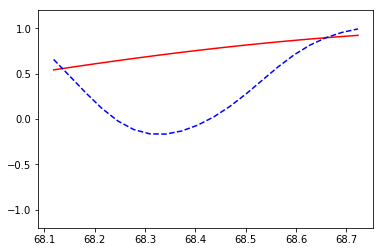

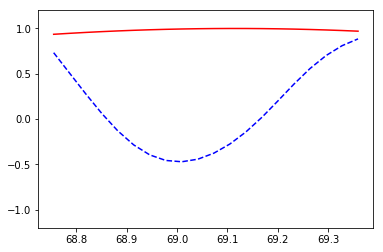

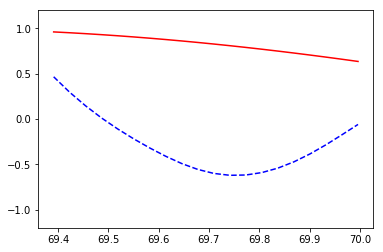

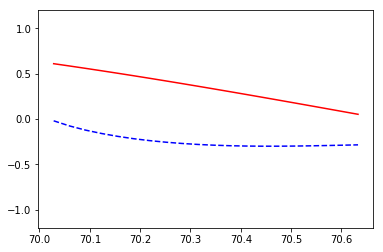

train cost:  0.0183958


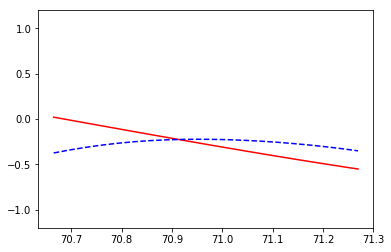

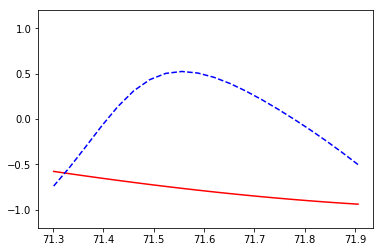

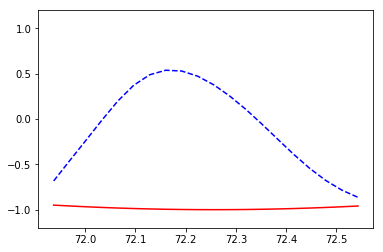

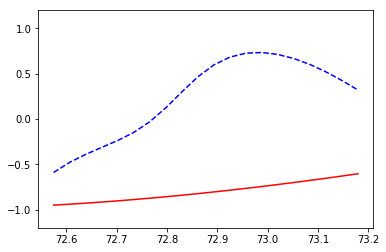

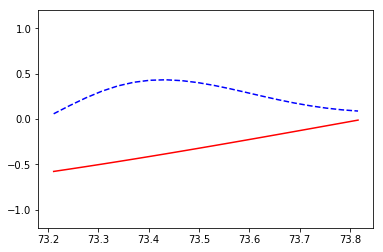

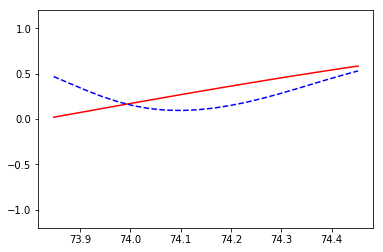

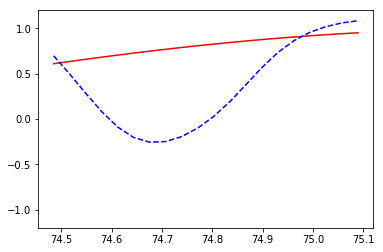

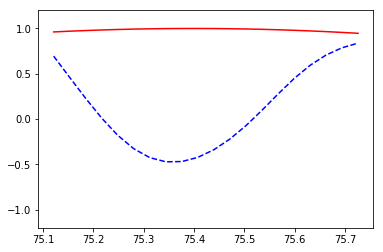

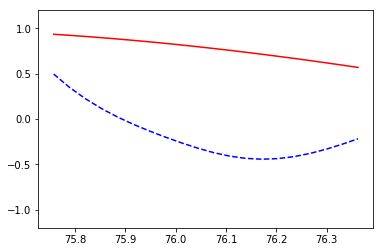

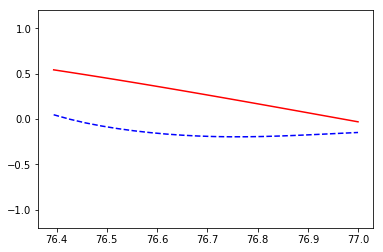

train cost:  0.0271043


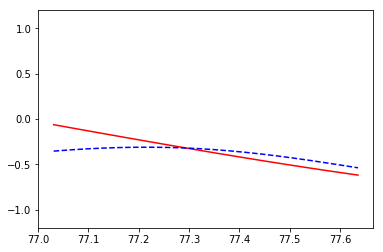

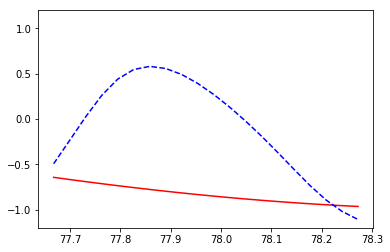

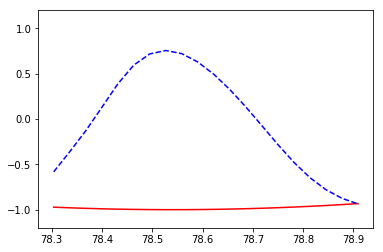

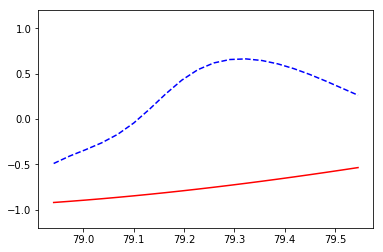

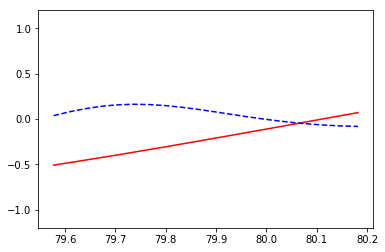

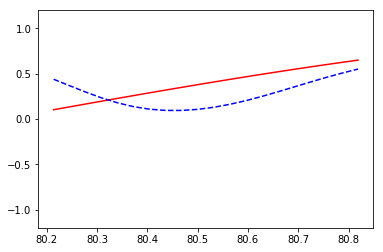

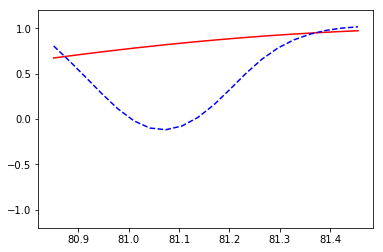

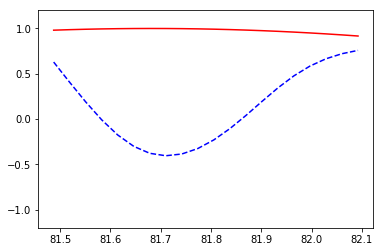

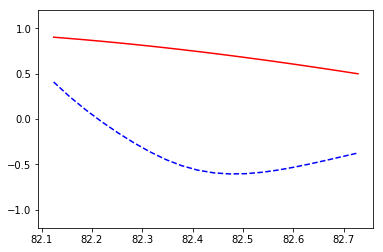

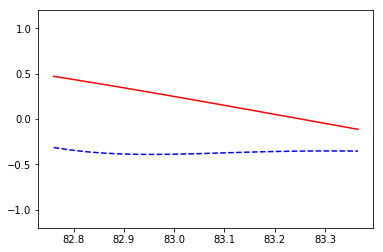

train cost:  0.0280806


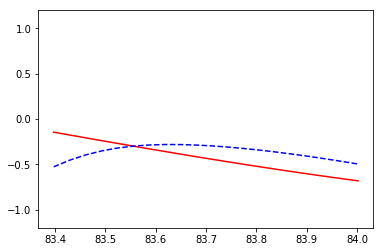

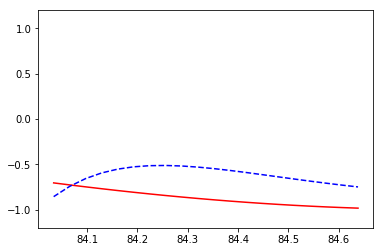

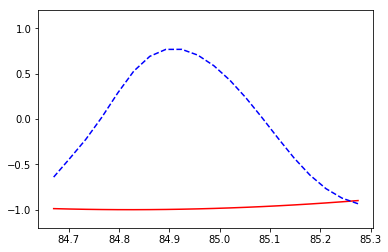

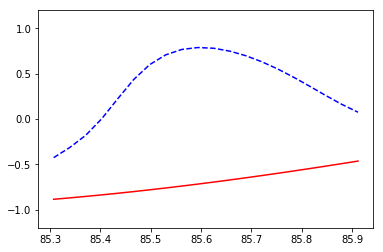

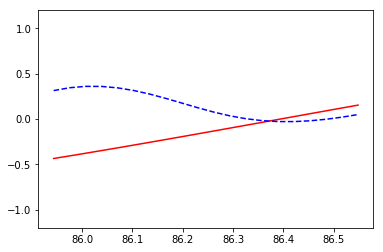

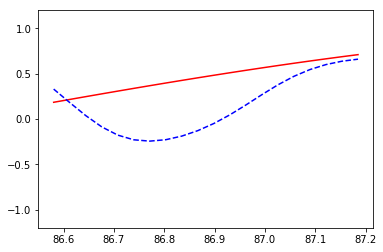

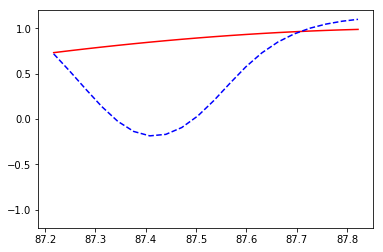

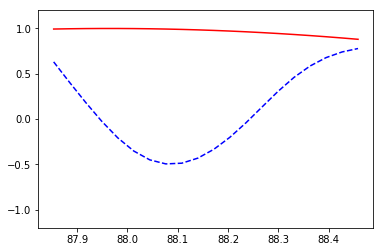

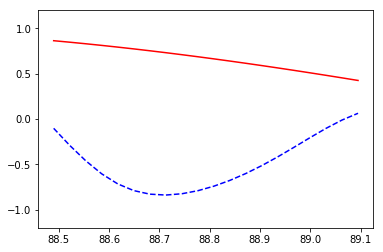

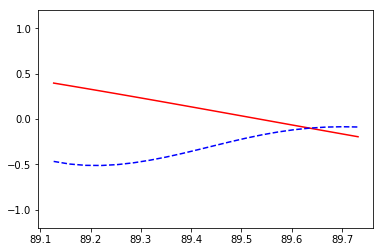

train cost:  0.0104801


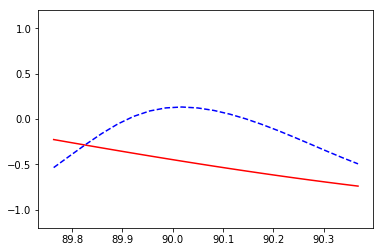

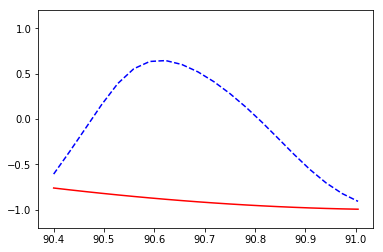

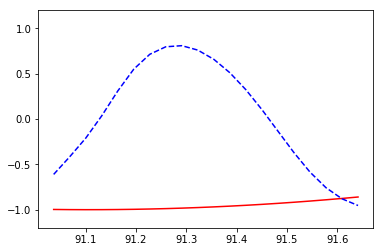

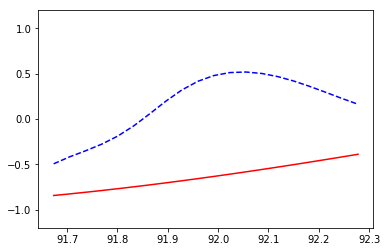

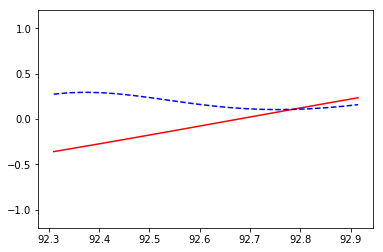

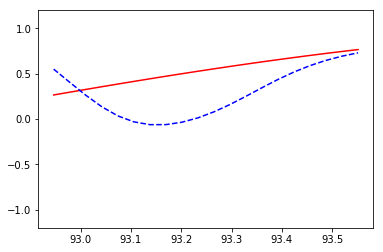

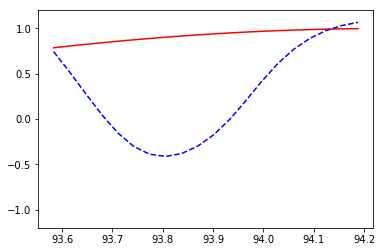

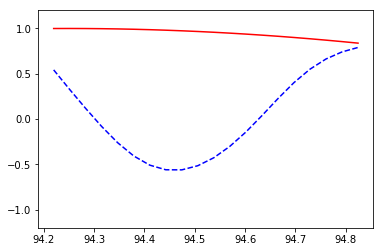

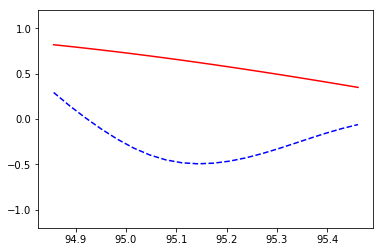

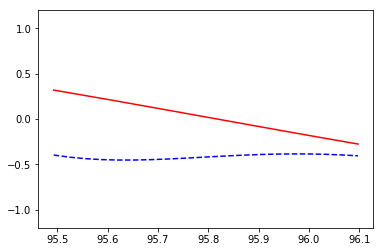

train cost:  0.0107178


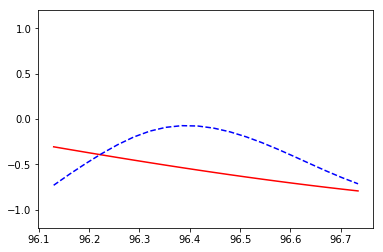

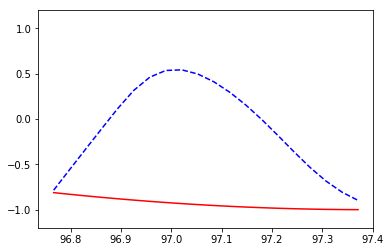

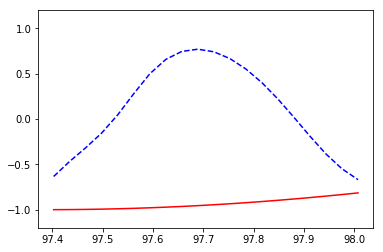

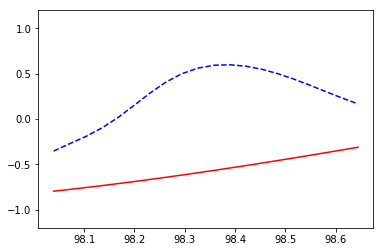

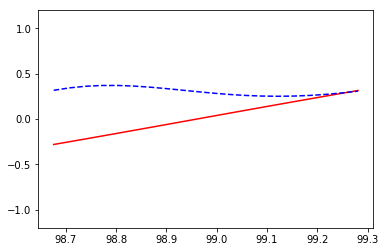

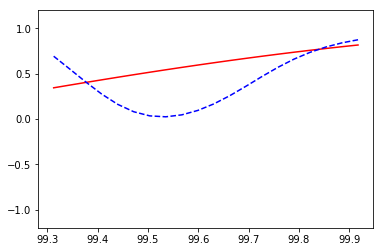

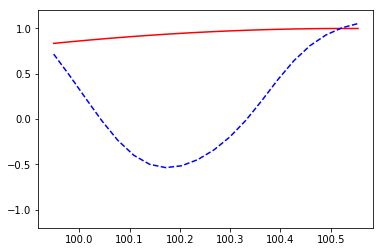

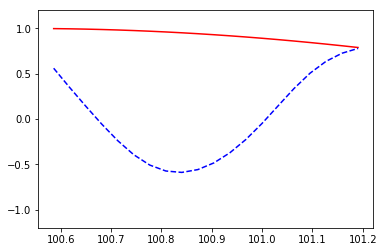

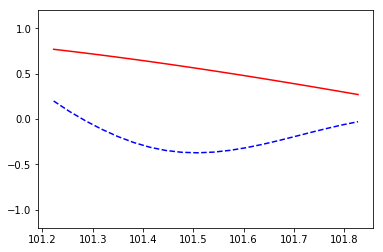

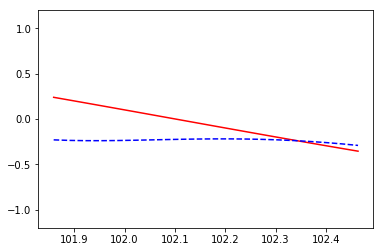

train cost:  0.00626955


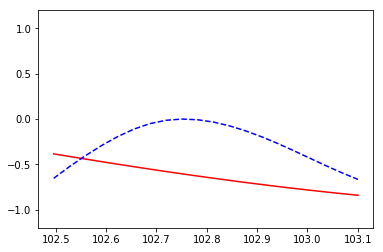

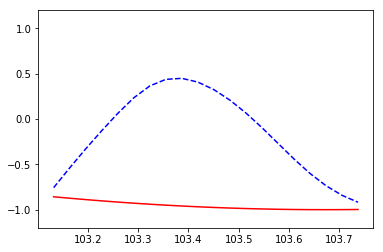

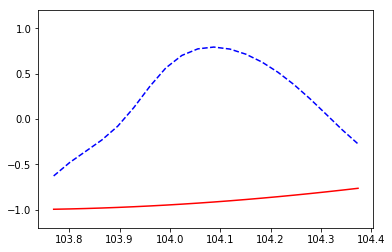

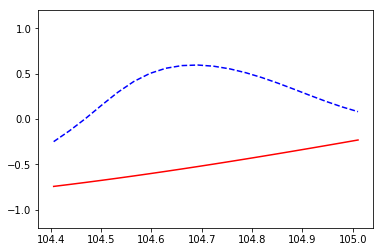

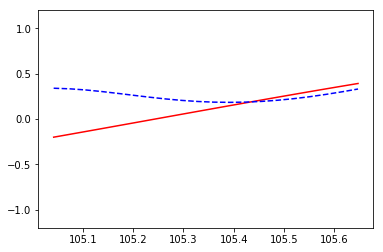

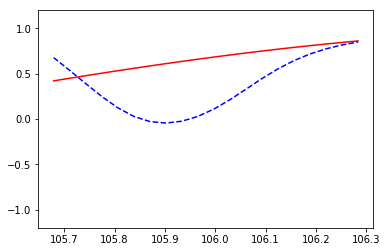

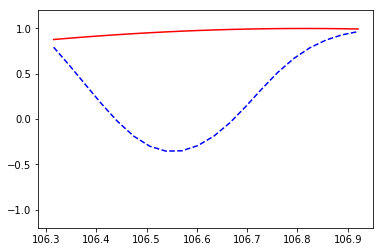

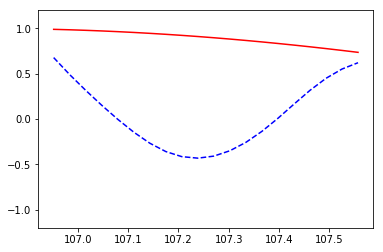

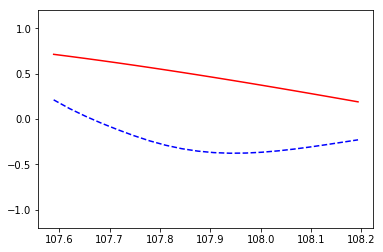

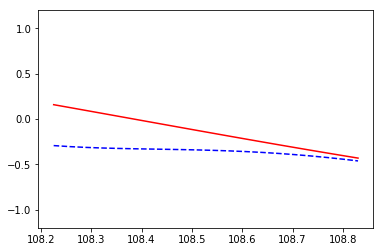

train cost:  0.00893487


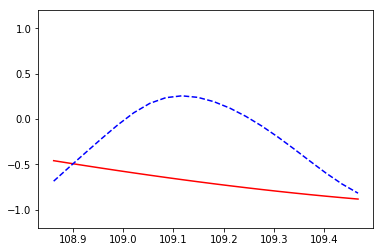

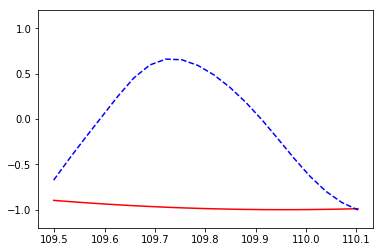

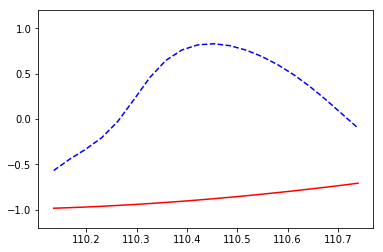

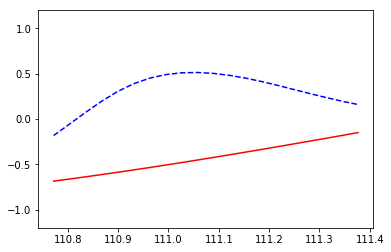

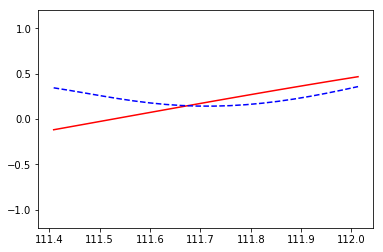

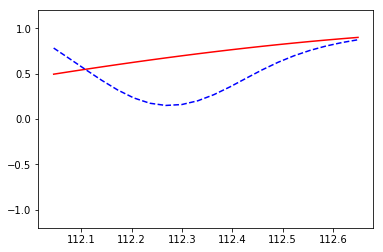

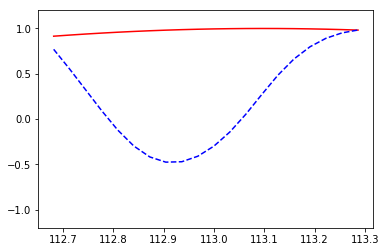

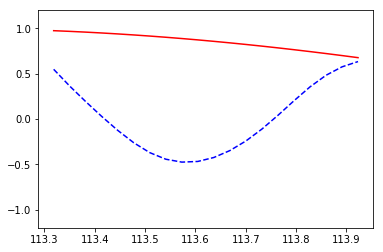

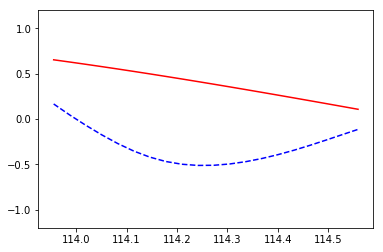

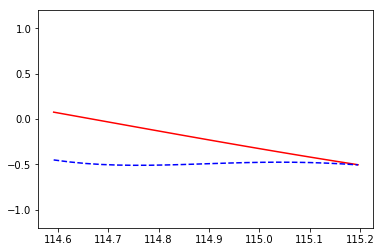

train cost:  0.0178078


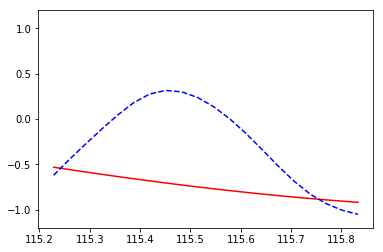

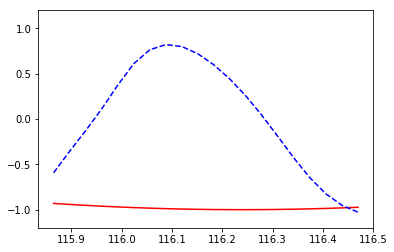

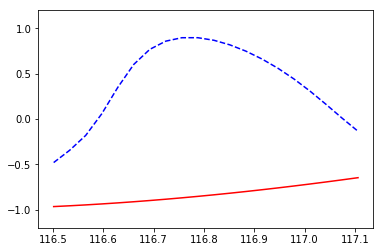

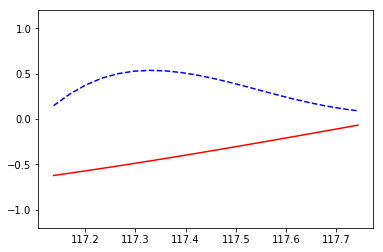

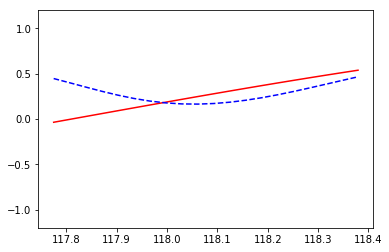

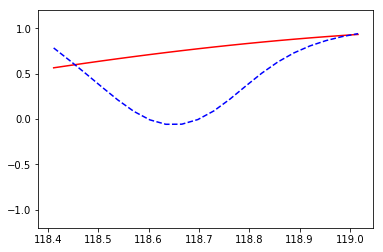

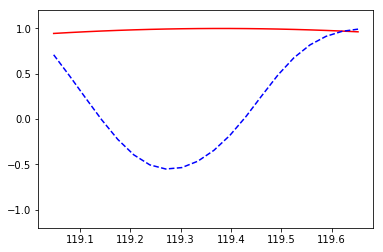

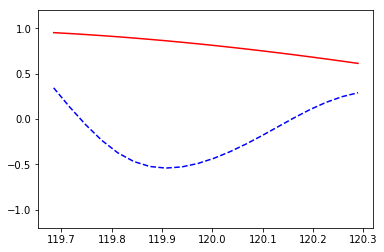

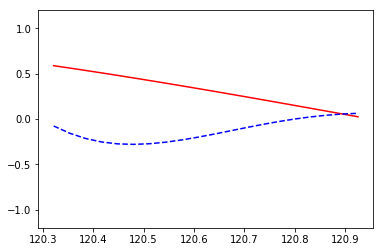

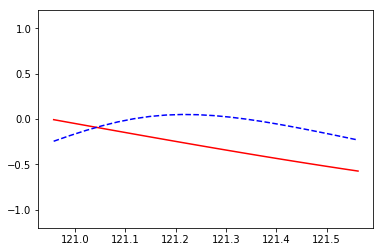

train cost:  0.0362384


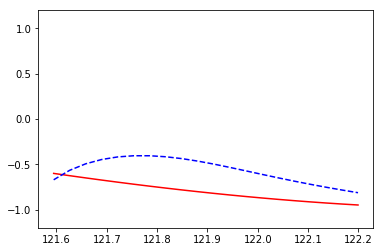

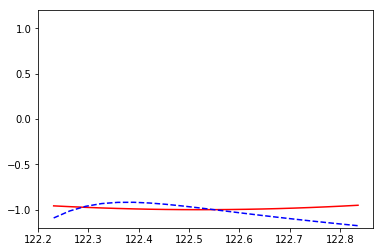

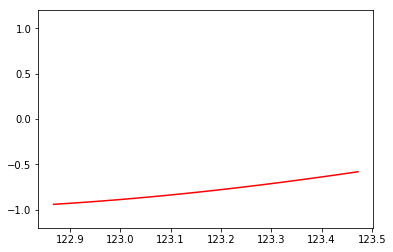

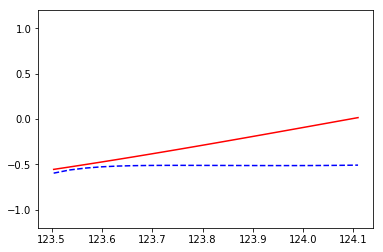

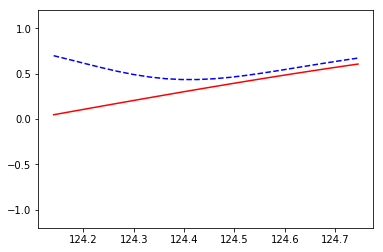

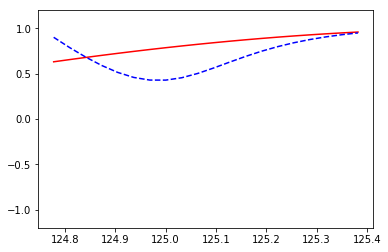

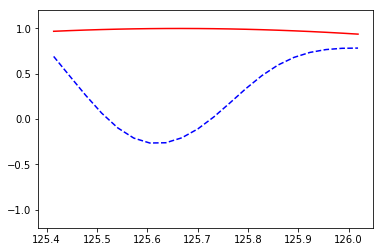

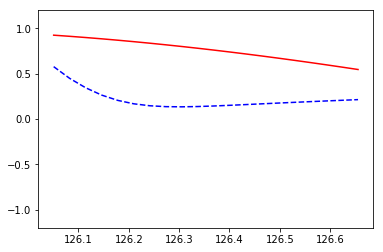

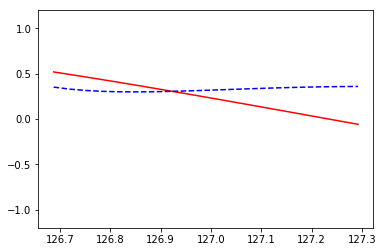

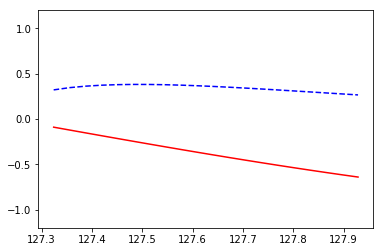

train cost:  0.550914


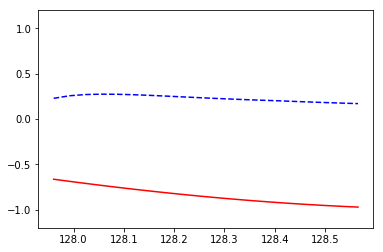

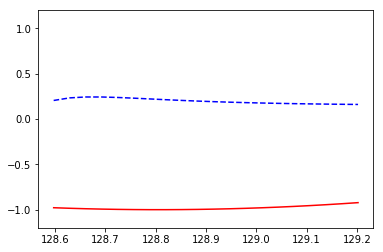

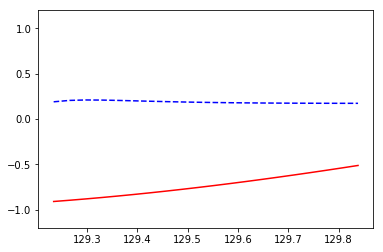

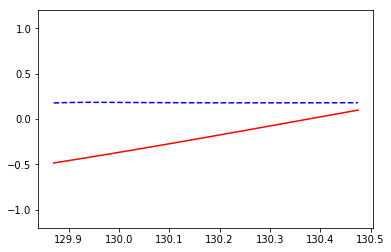

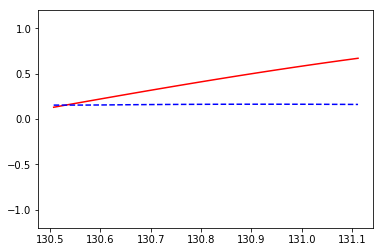

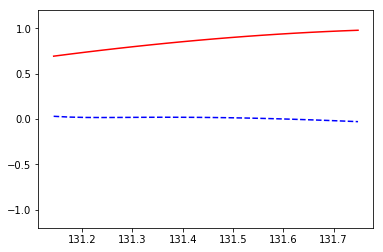

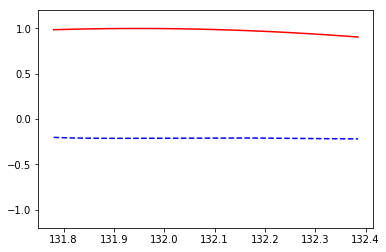

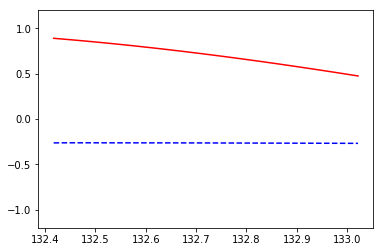

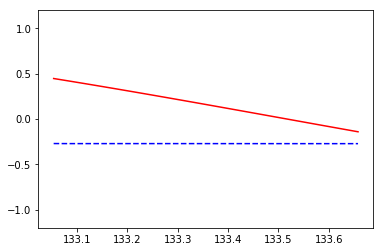

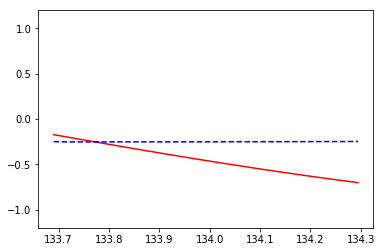

train cost:  0.390362


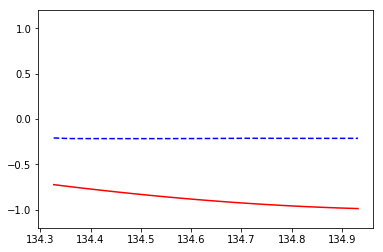

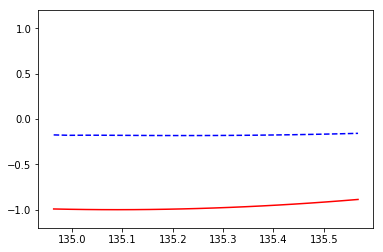

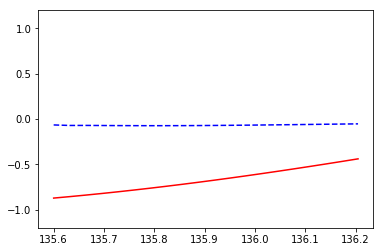

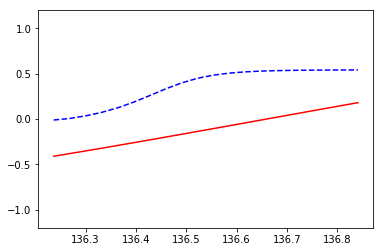

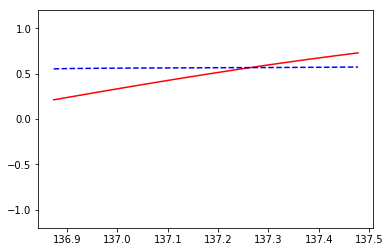

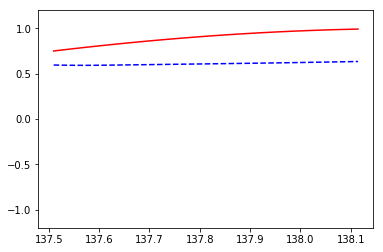

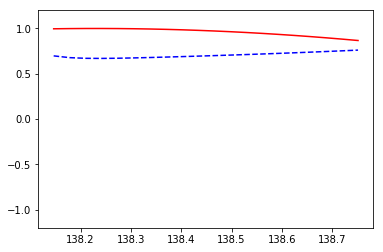

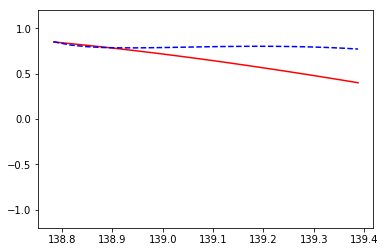

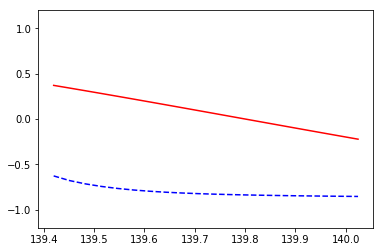

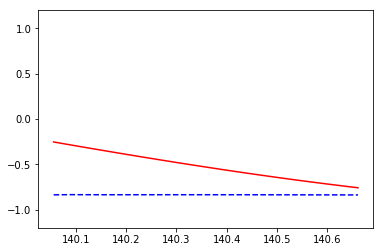

train cost:  0.282467


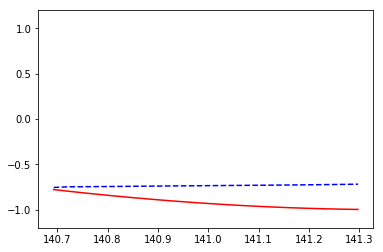

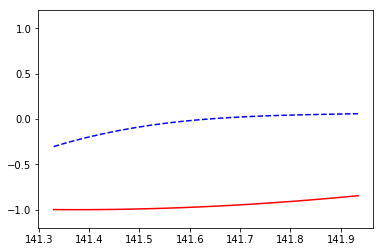

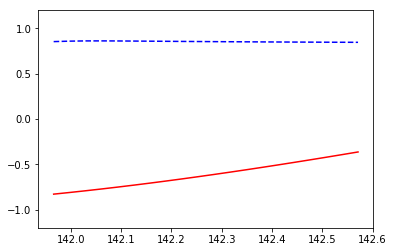

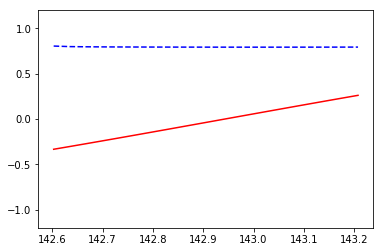

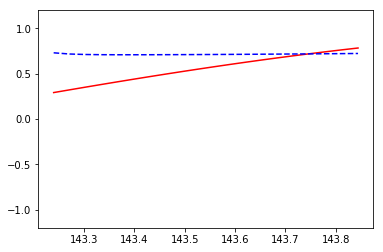

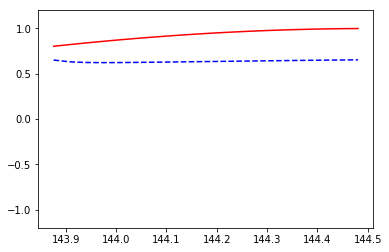

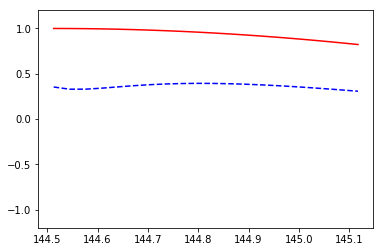

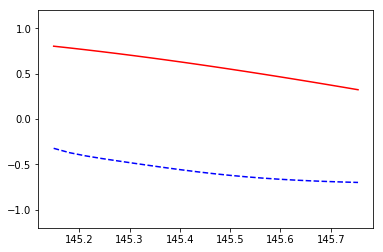

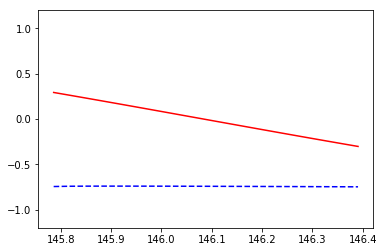

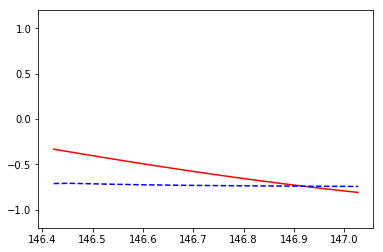

train cost:  0.27292


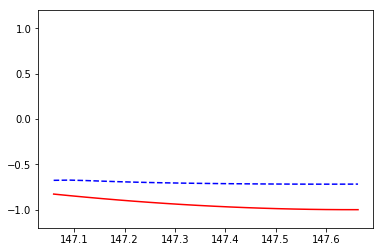

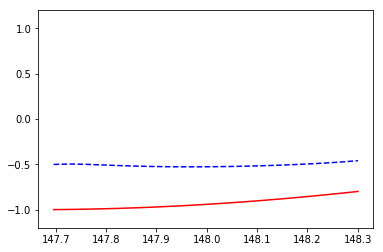

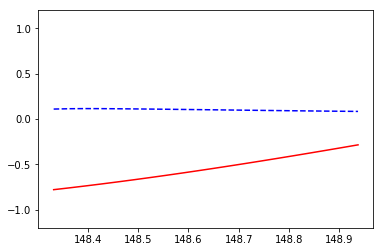

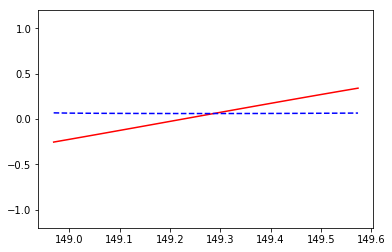

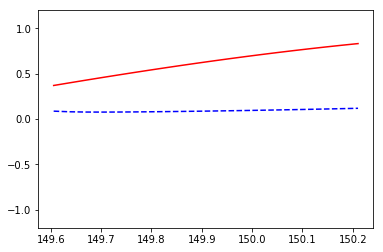

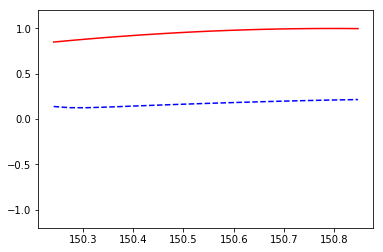

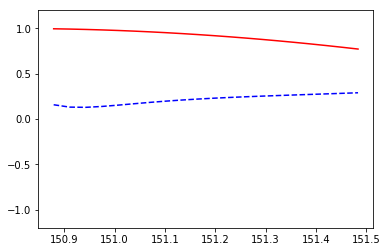

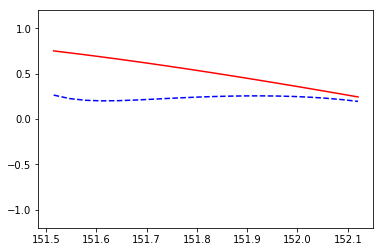

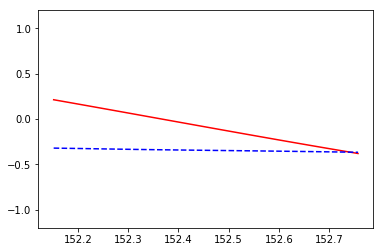

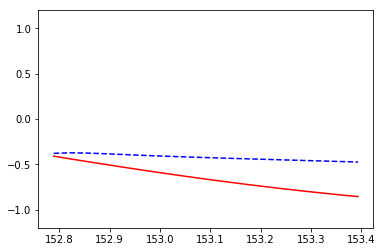

train cost:  0.156078


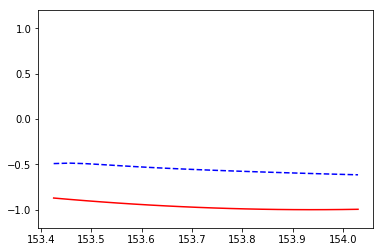

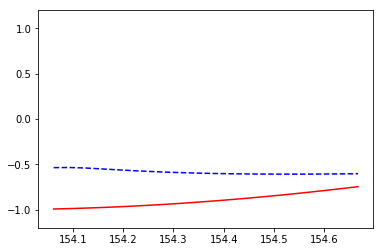

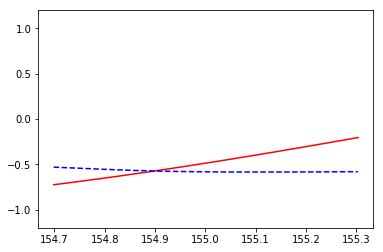

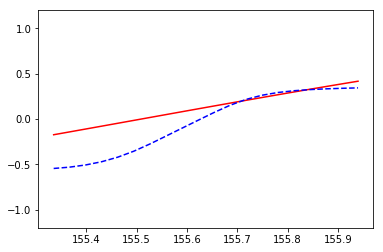

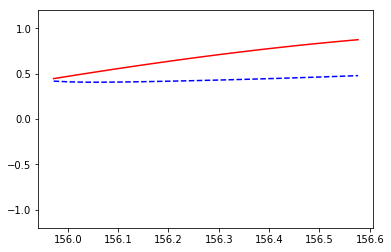

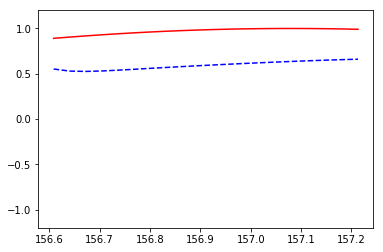

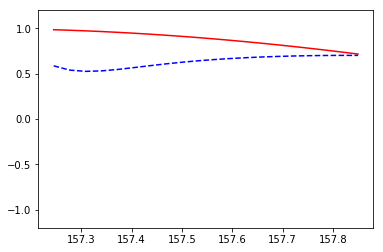

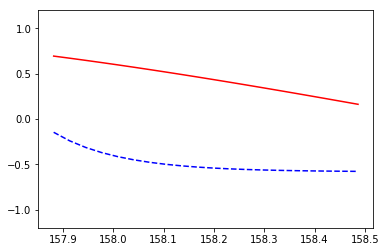

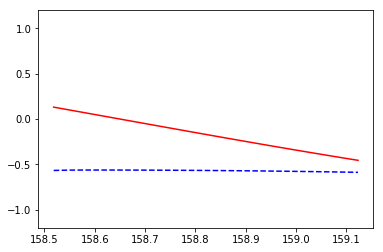

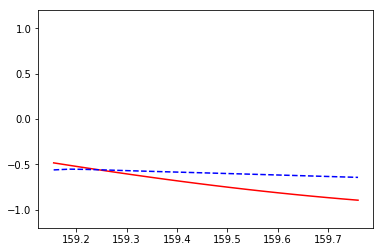

train cost:  0.0607123


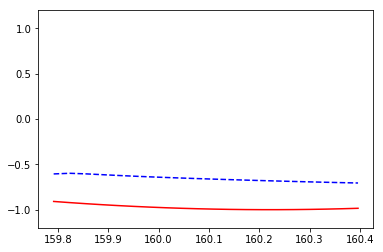

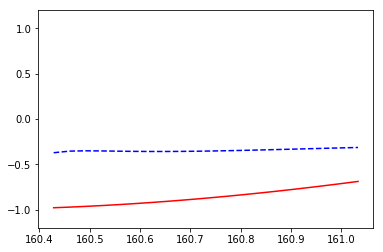

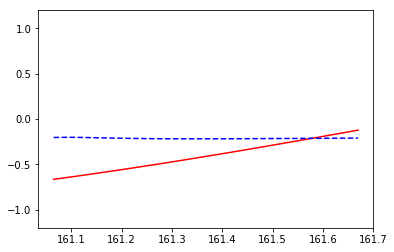

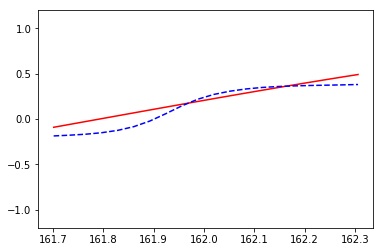

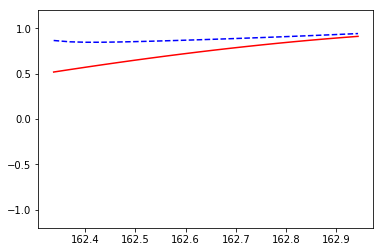

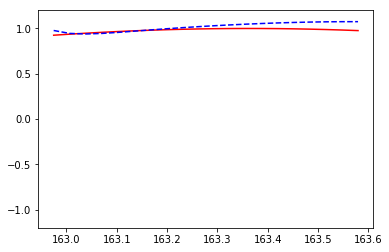

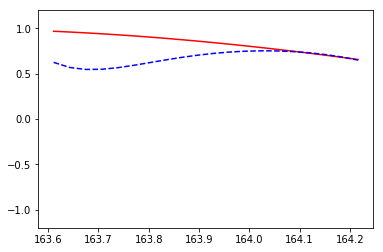

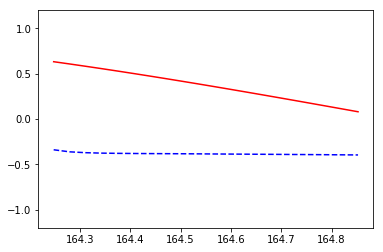

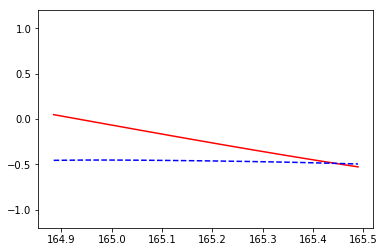

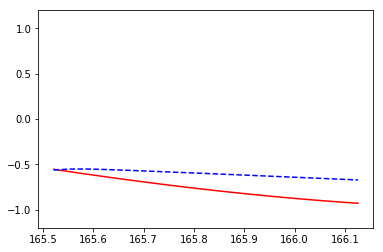

train cost:  0.081103


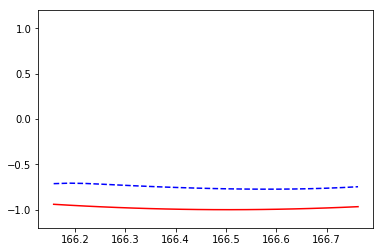

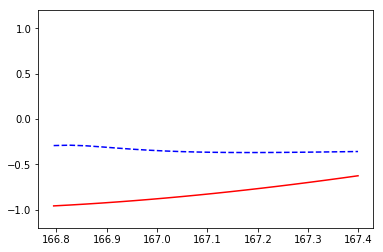

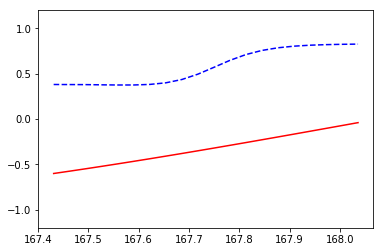

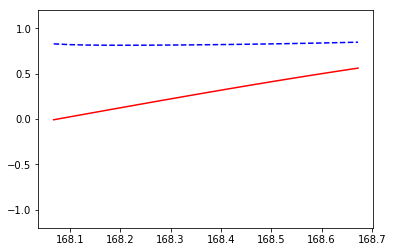

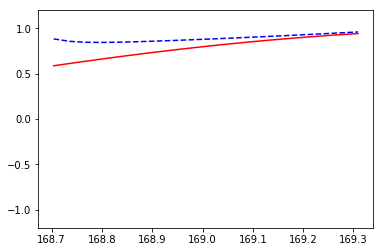

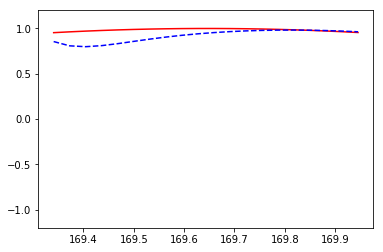

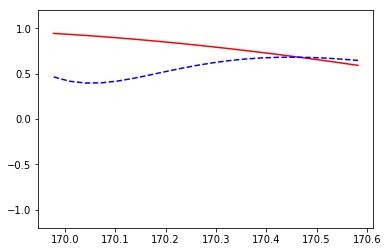

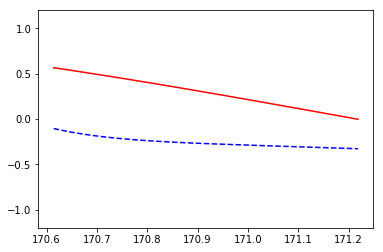

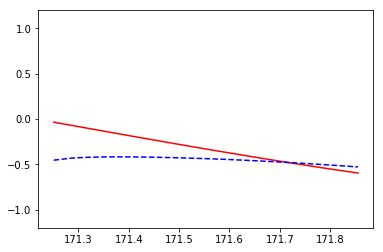

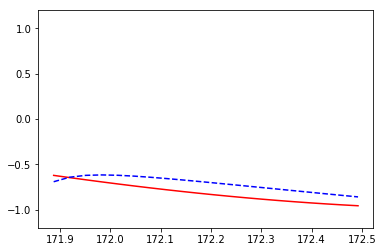

train cost:  0.122999


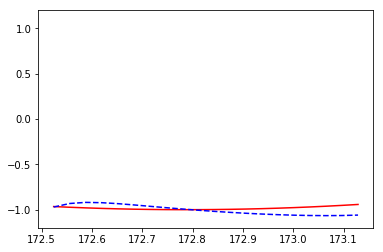

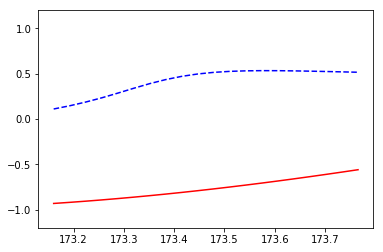

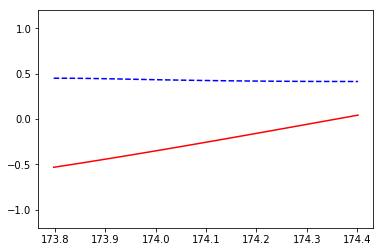

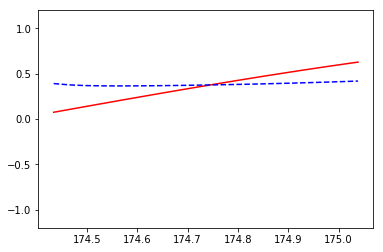

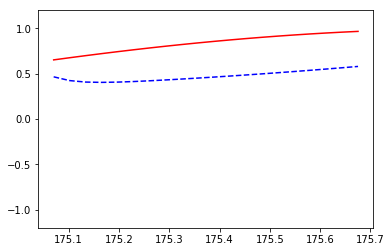

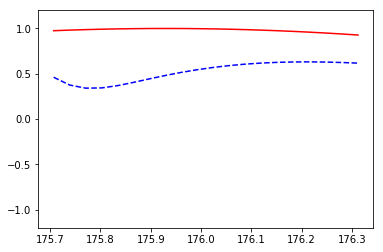

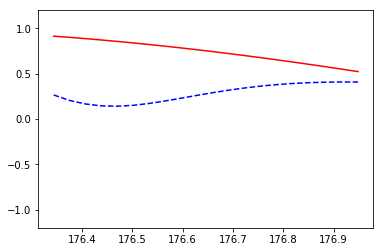

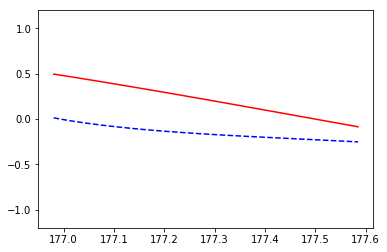

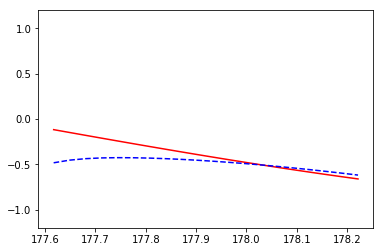

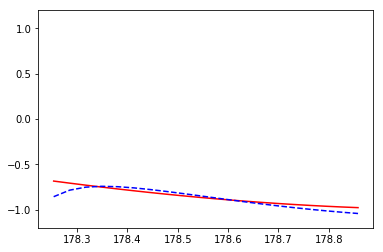

train cost:  0.114949


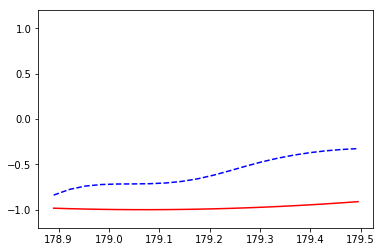

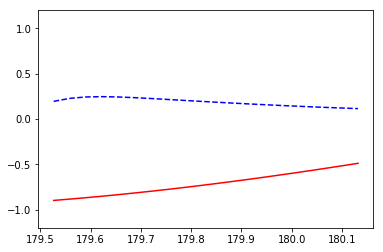

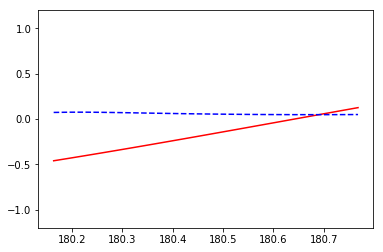

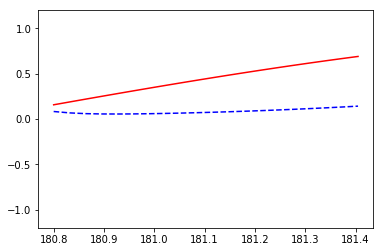

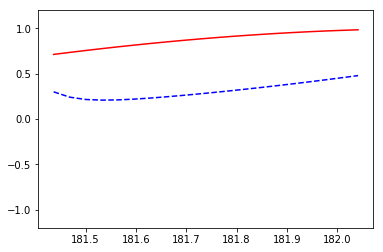

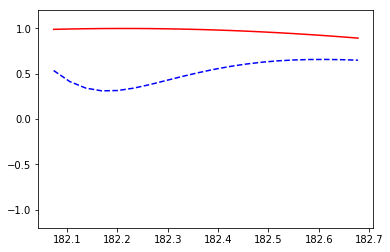

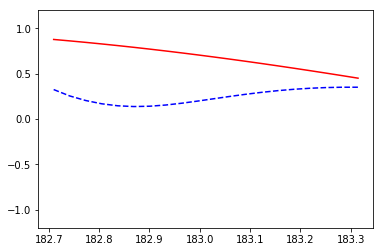

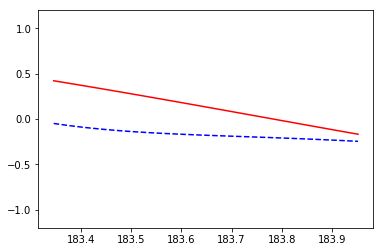

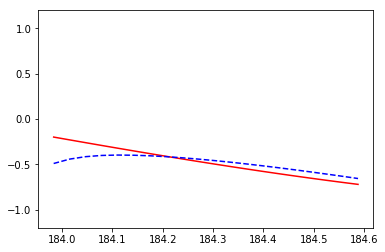

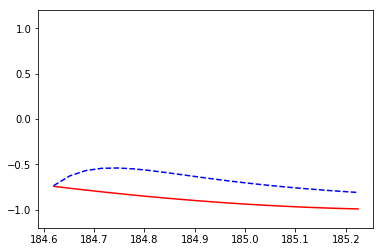

train cost:  0.0531048


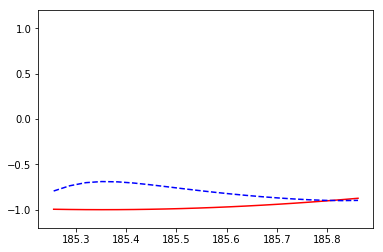

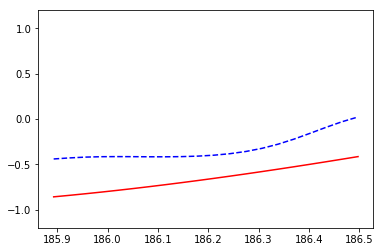

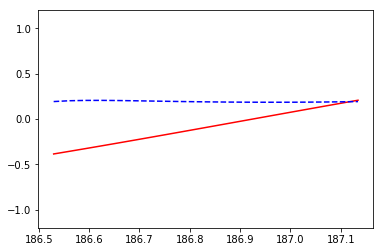

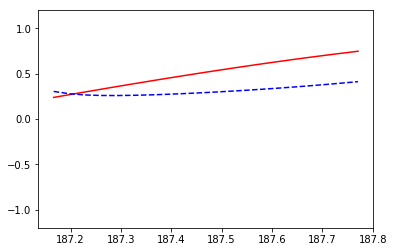

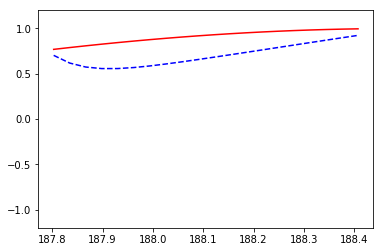

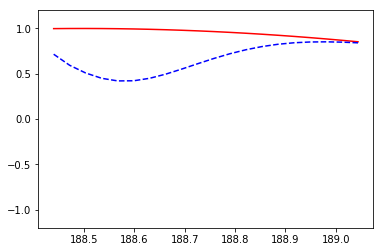

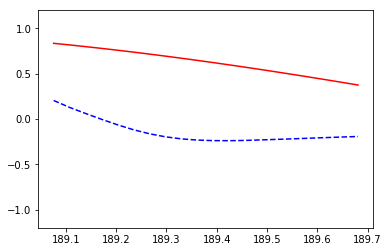

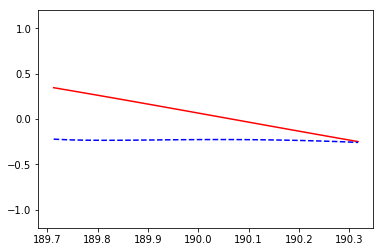

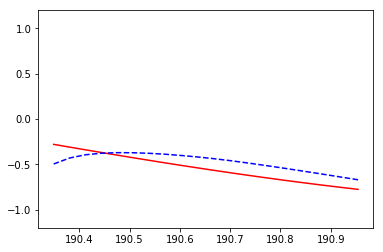

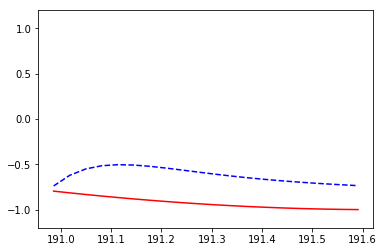

train cost:  0.0289521


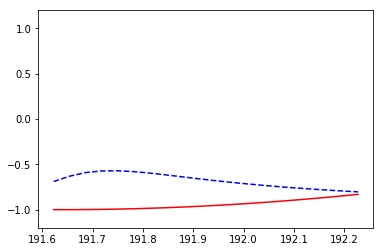

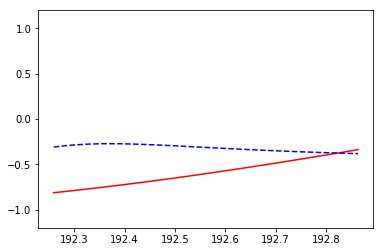

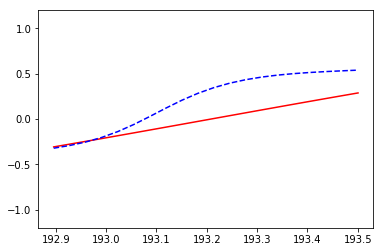

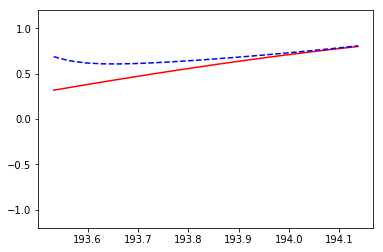

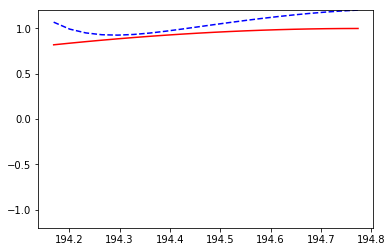

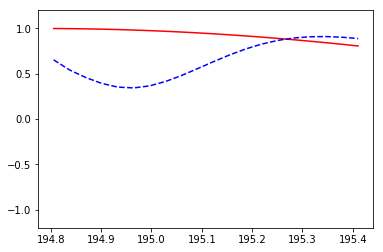

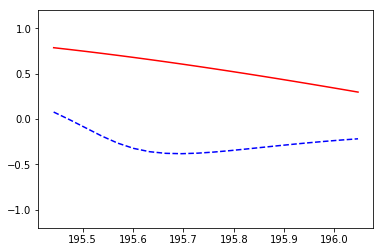

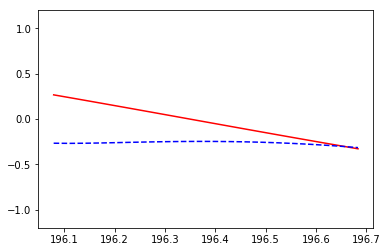

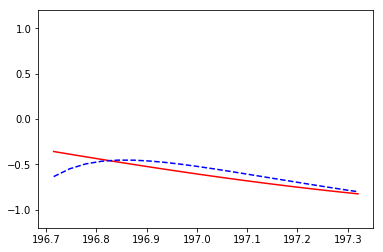

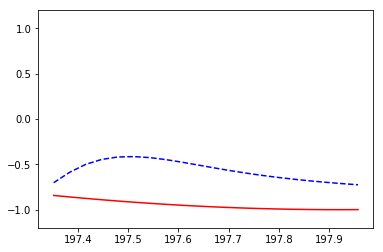

train cost:  0.0721827


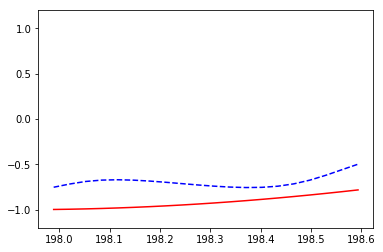

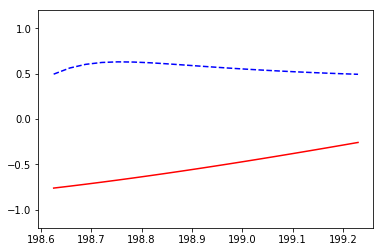

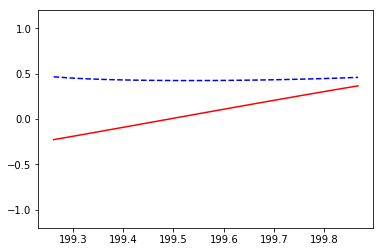

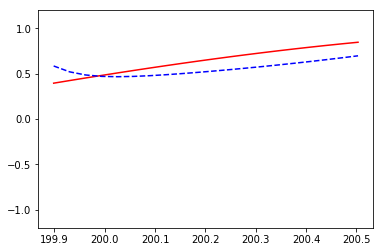

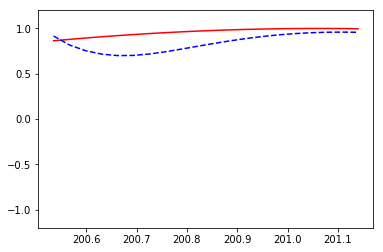

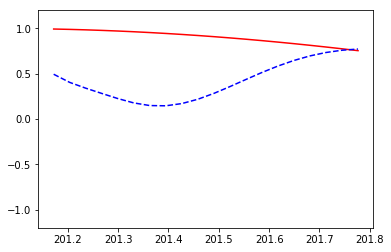

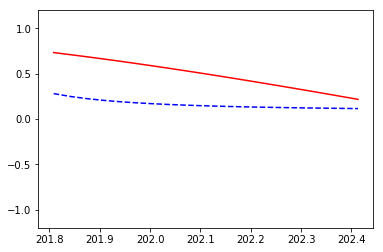

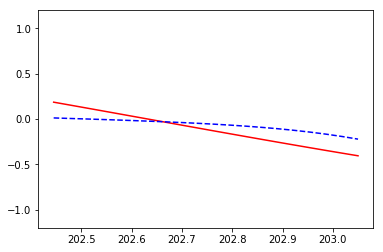

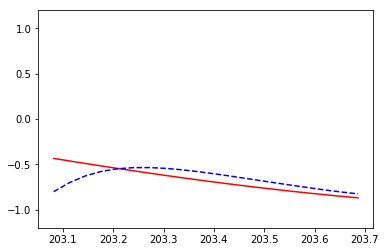

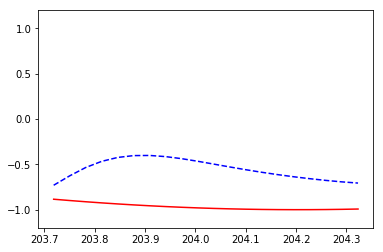

train cost:  0.106036


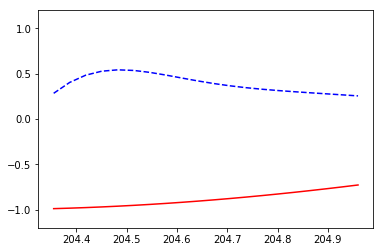

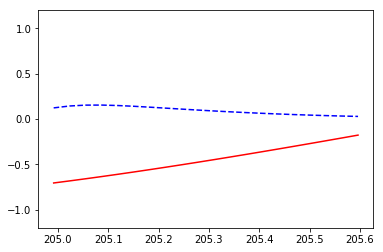

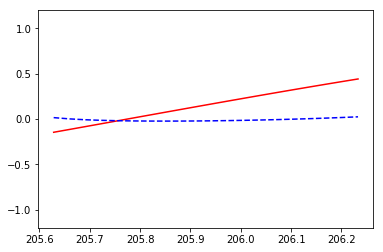

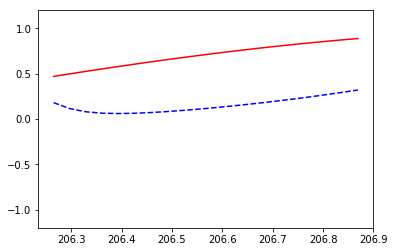

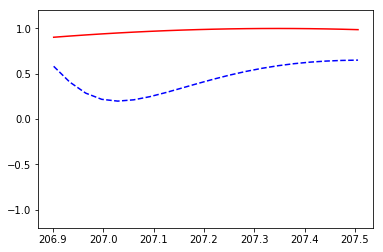

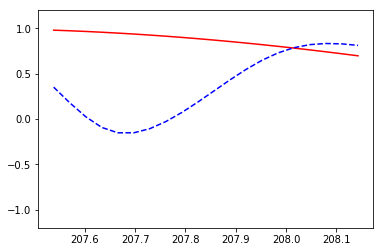

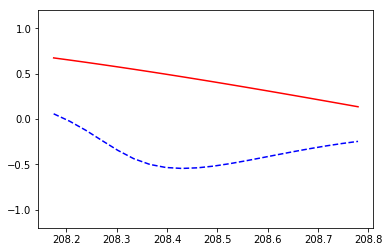

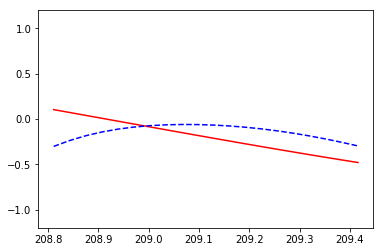

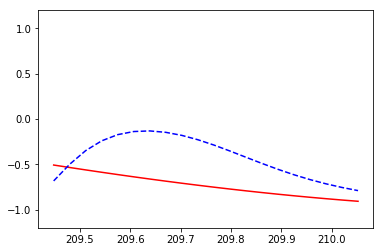

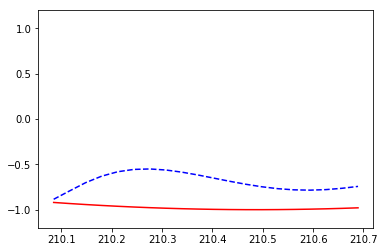

train cost:  0.0855919


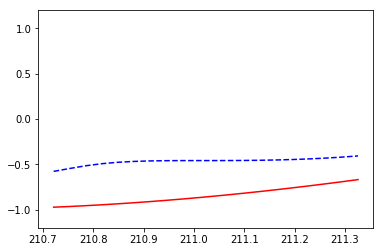

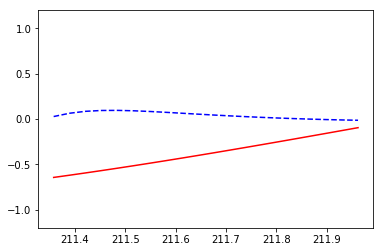

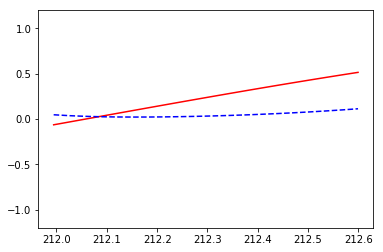

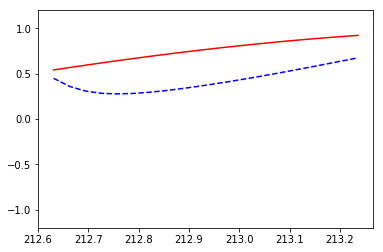

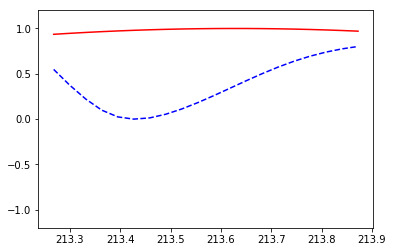

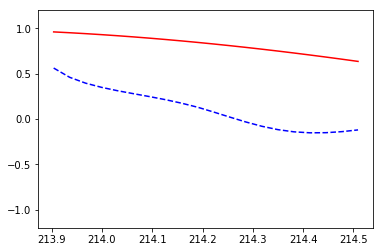

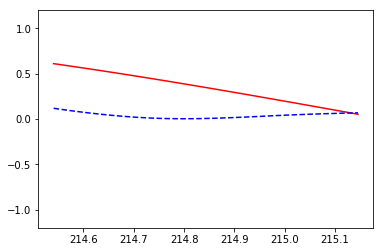

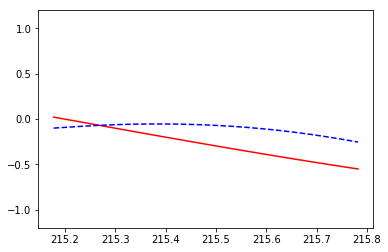

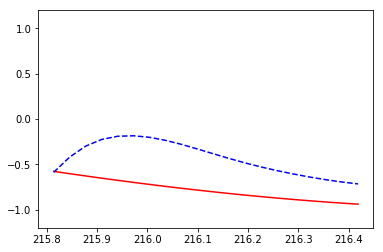

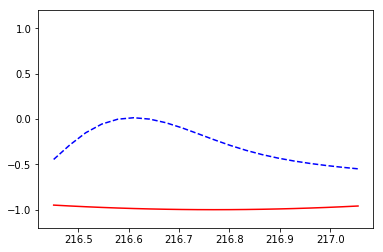

train cost:  0.190576


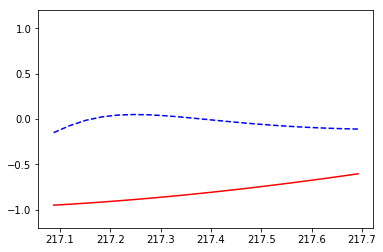

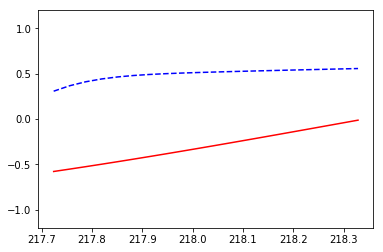

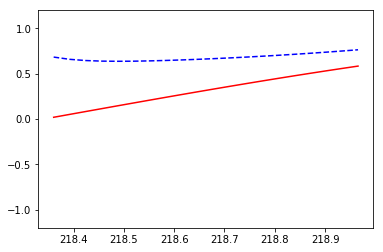

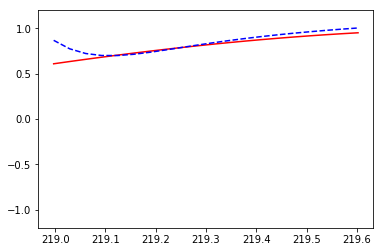

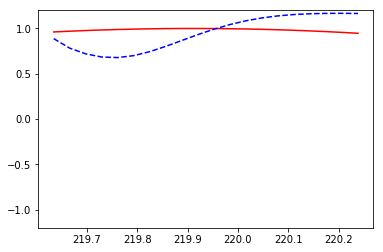

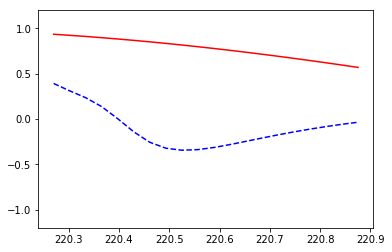

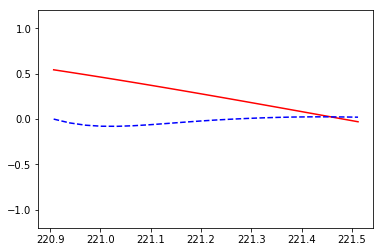

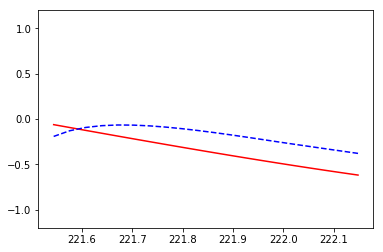

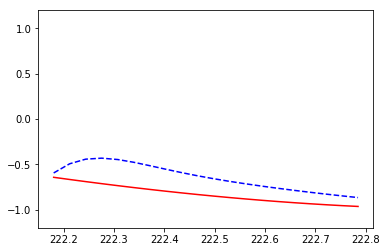

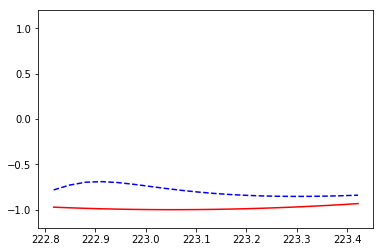

train cost:  0.0693114


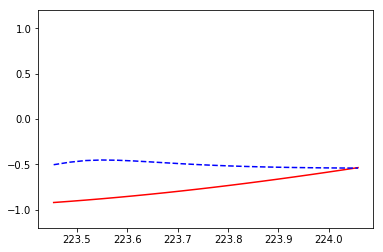

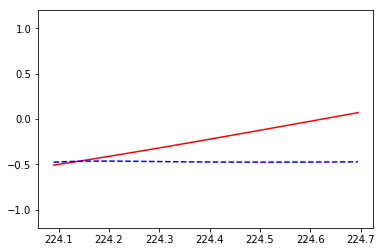

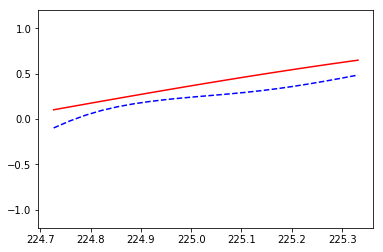

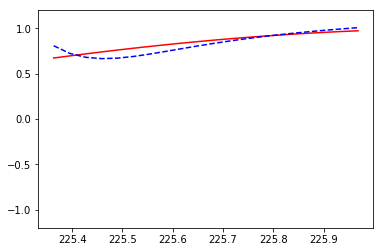

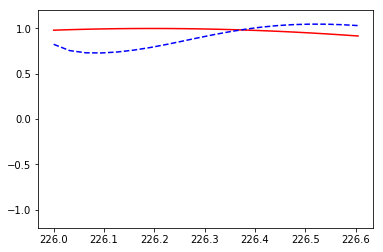

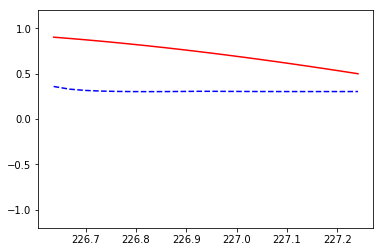

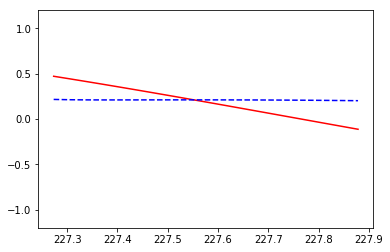

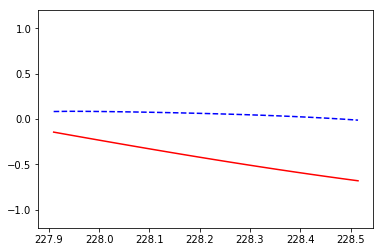

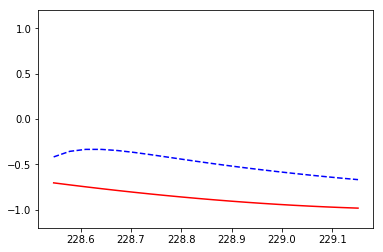

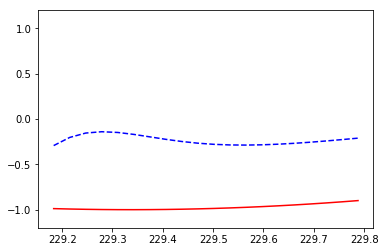

train cost:  0.152553


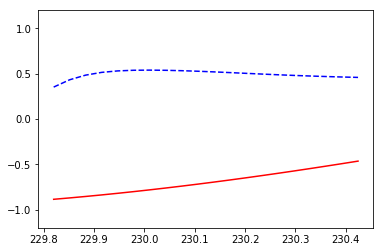

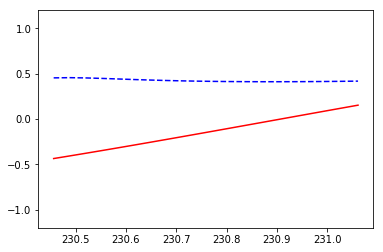

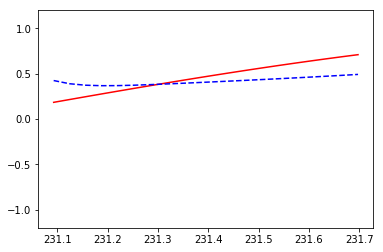

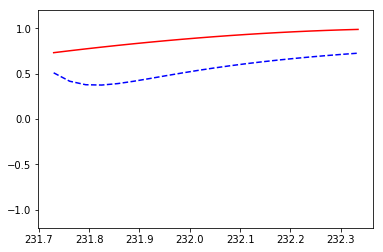

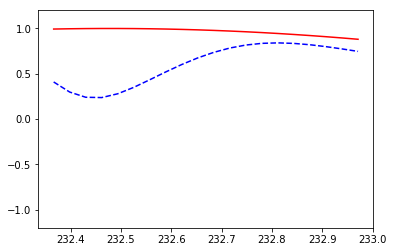

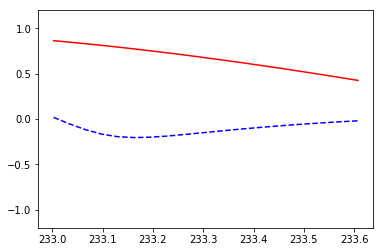

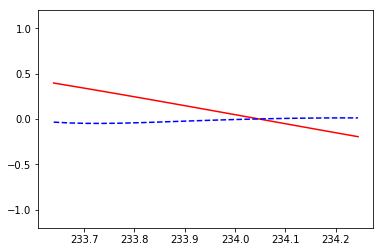

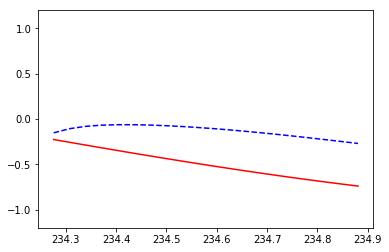

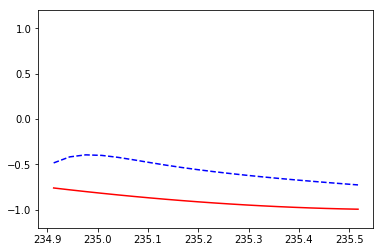

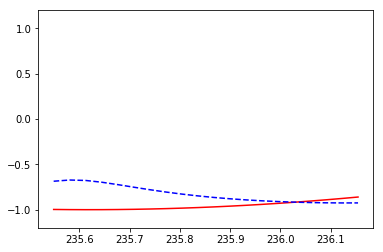

train cost:  0.0696914


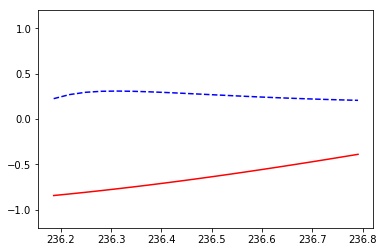

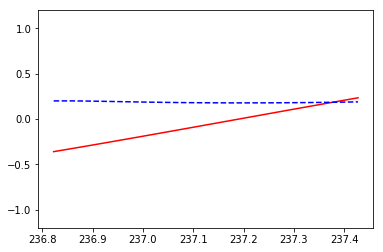

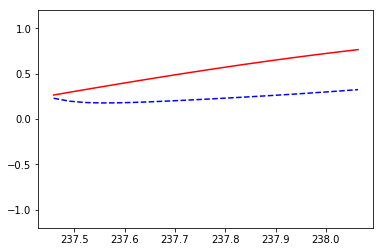

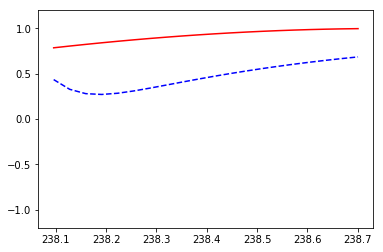

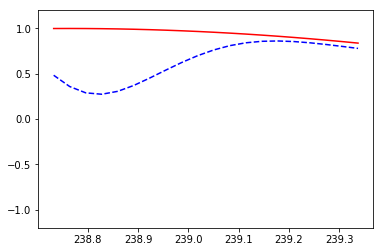

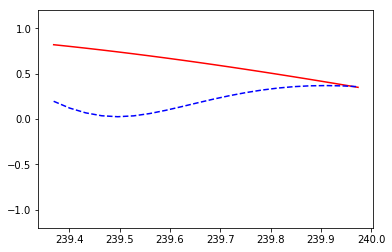

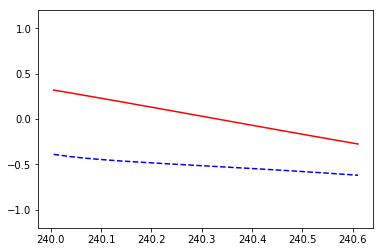

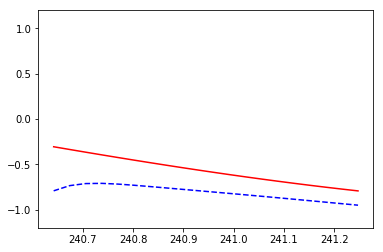

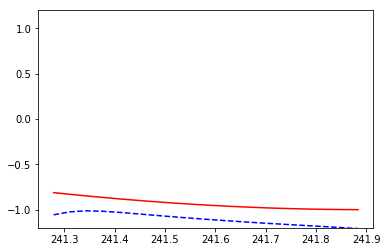

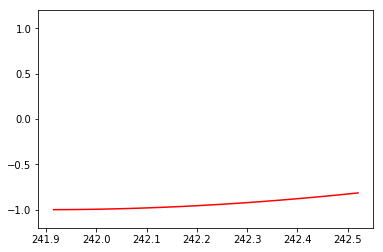

train cost:  0.112815


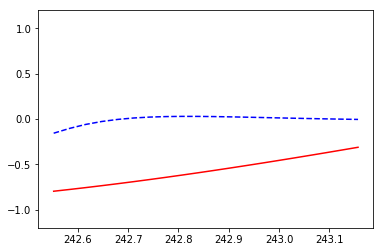

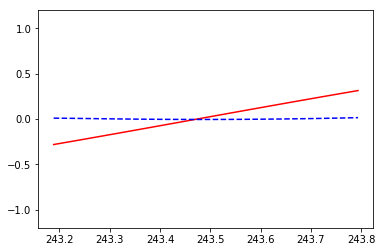

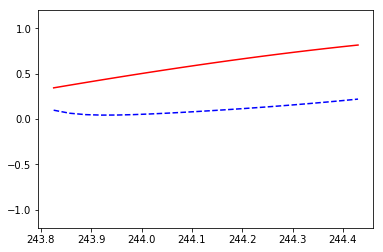

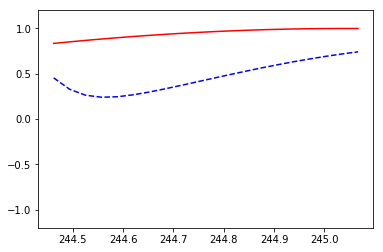

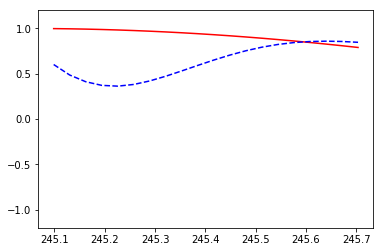

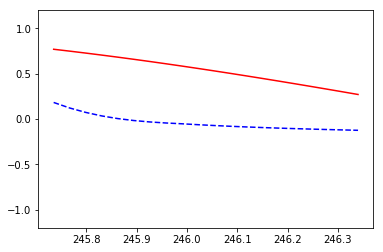

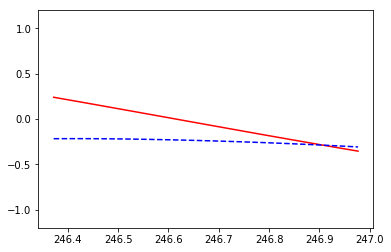

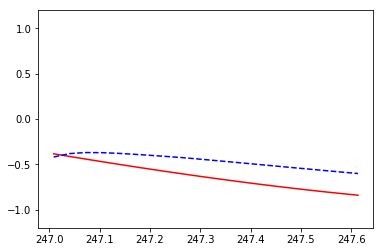

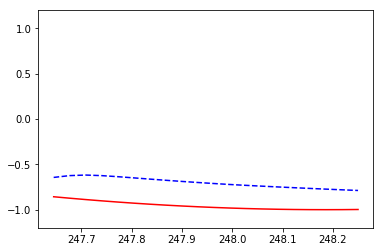

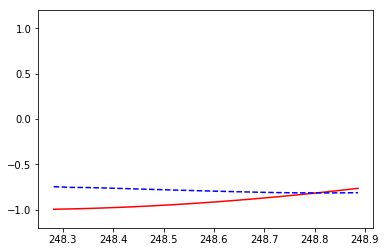

train cost:  0.0757191


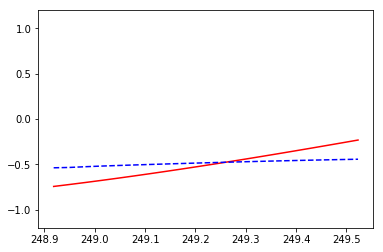

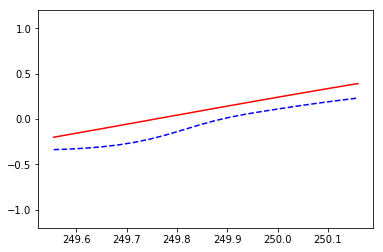

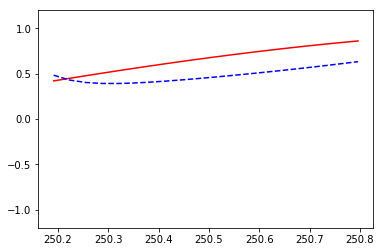

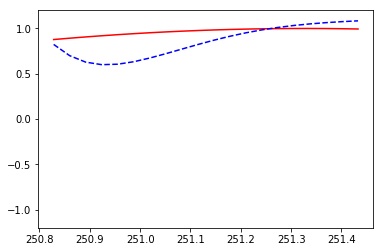

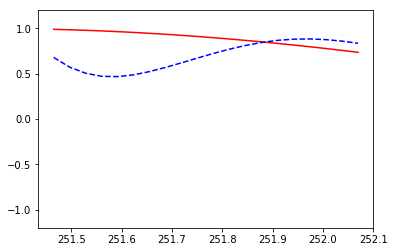

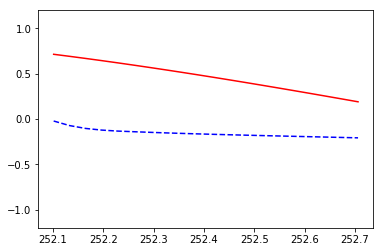

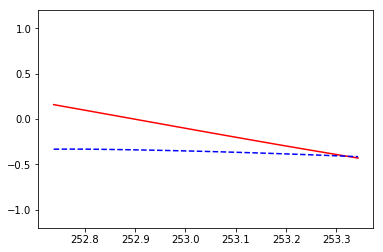

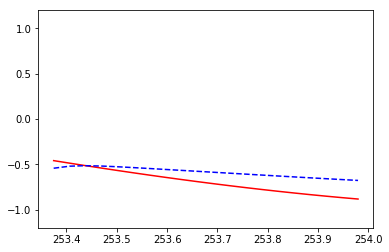

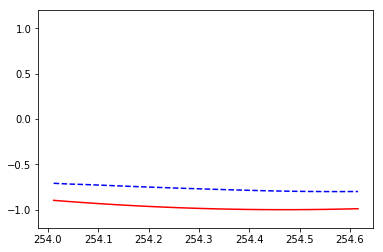

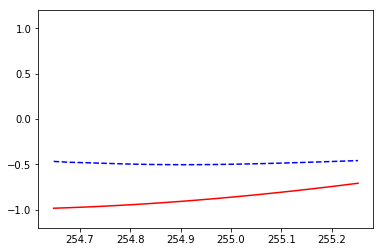

train cost:  0.0330752


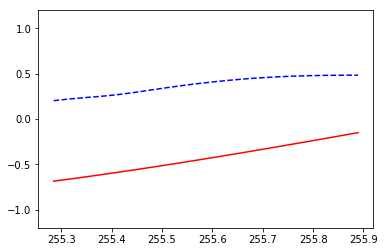

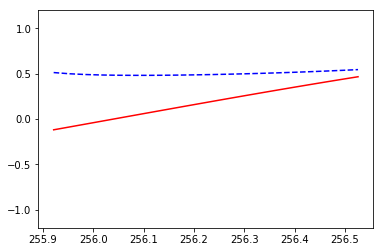

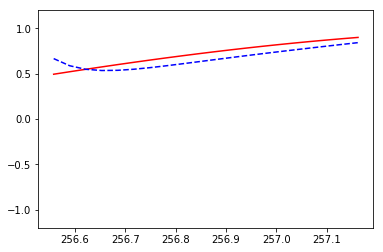

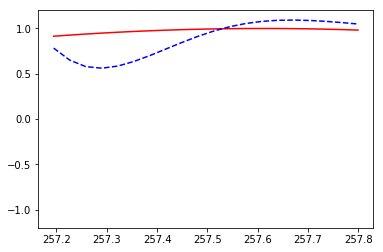

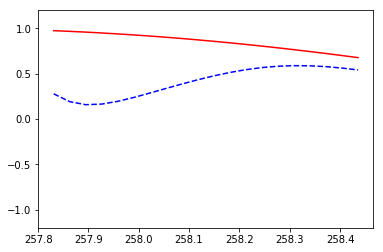

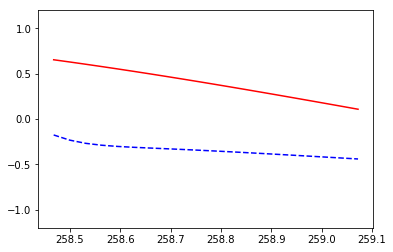

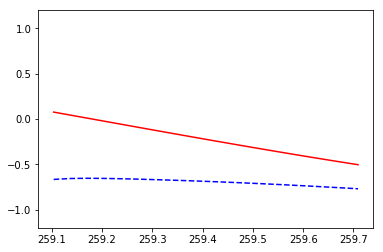

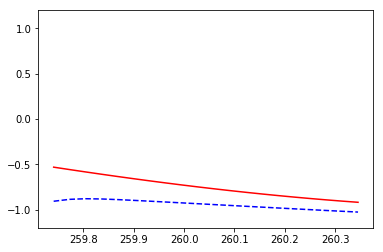

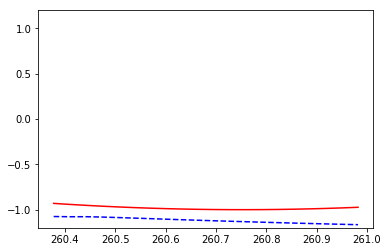

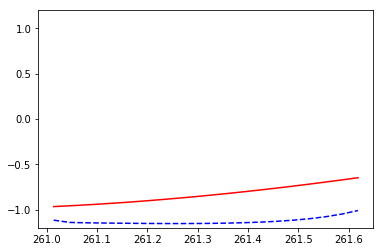

train cost:  0.0795405


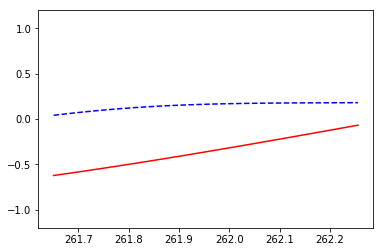

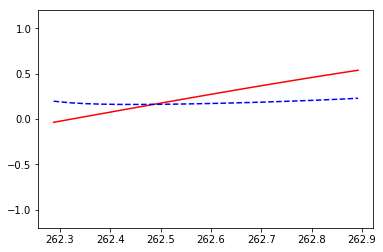

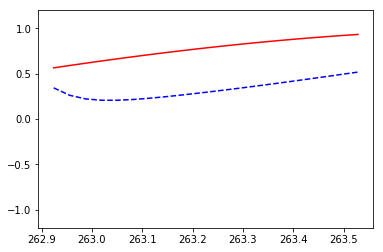

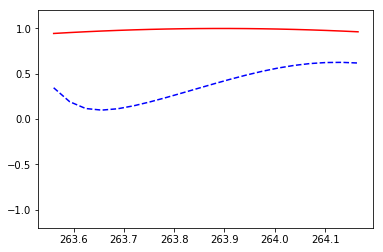

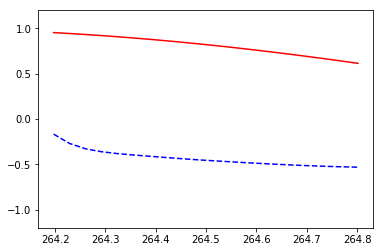

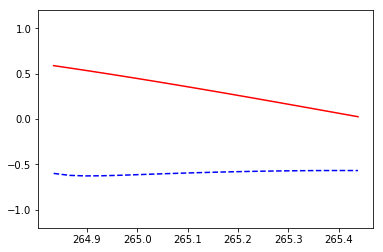

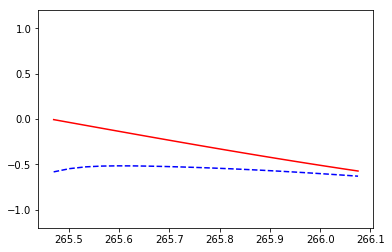

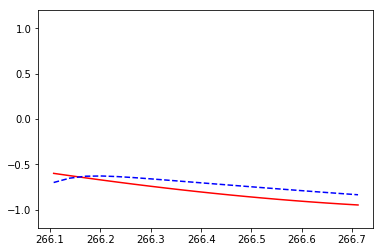

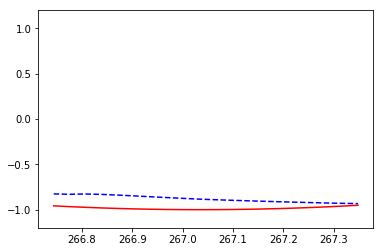

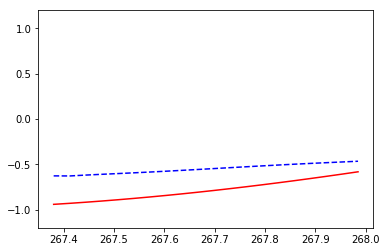

train cost:  0.189839


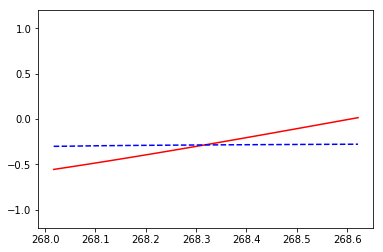

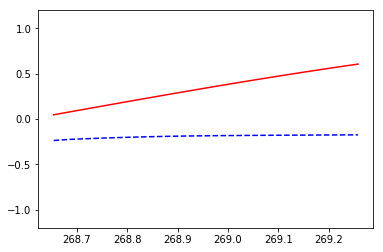

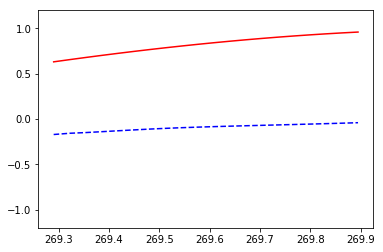

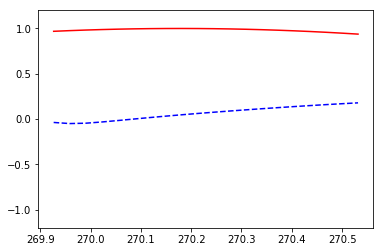

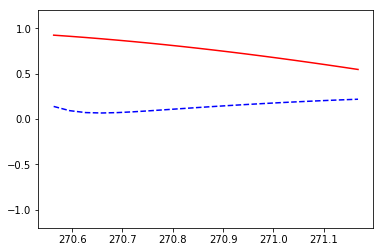

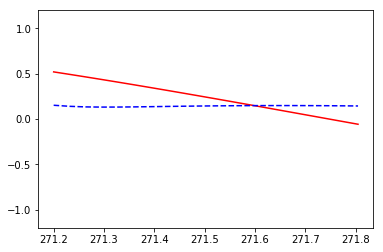

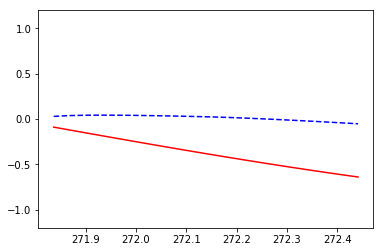

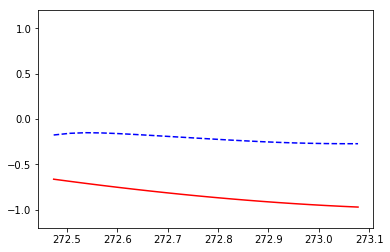

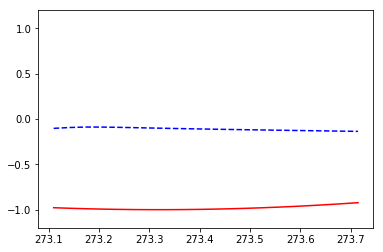

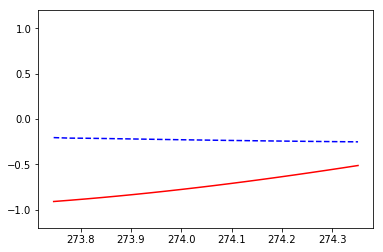

train cost:  0.169202


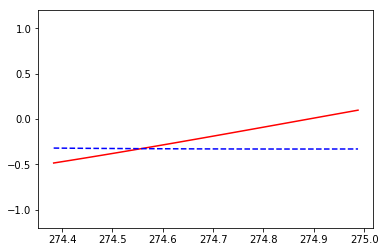

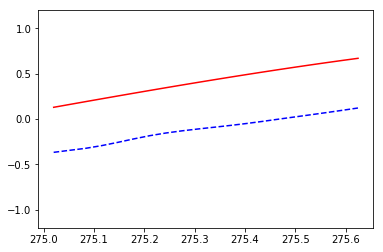

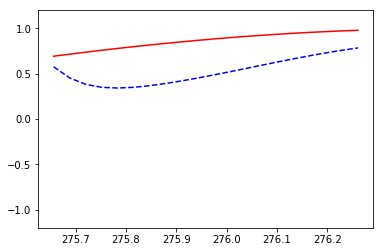

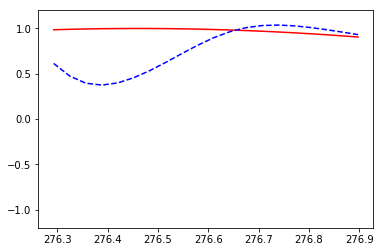

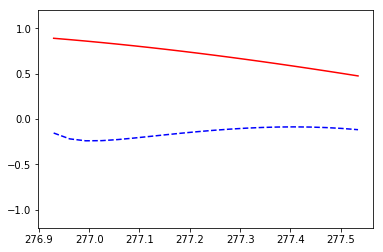

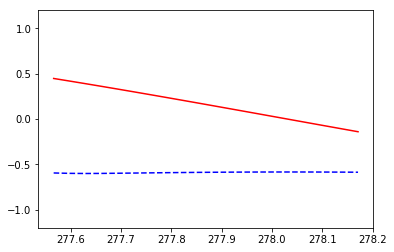

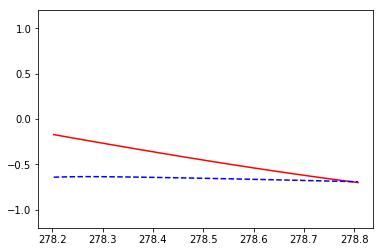

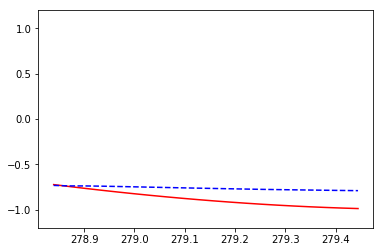

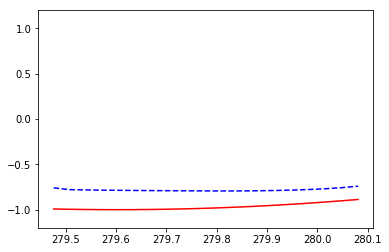

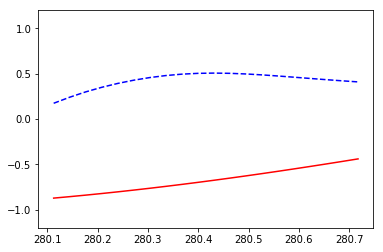

train cost:  0.0738956


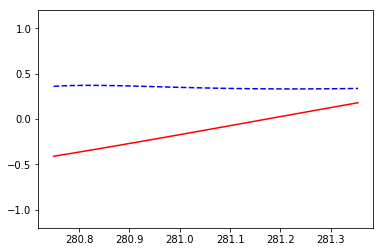

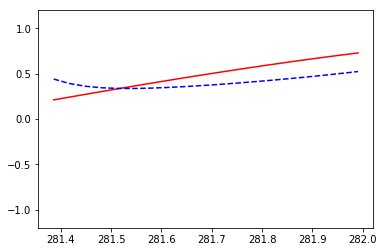

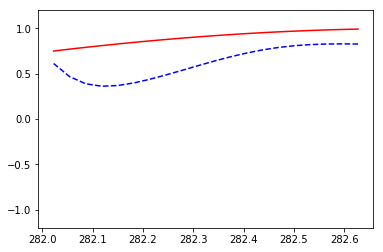

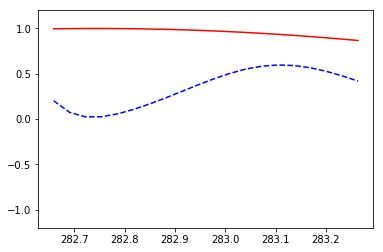

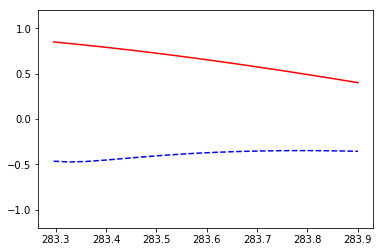

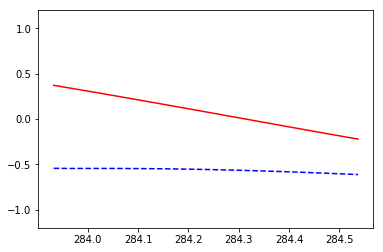

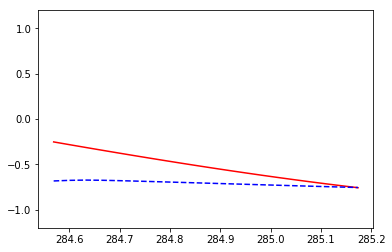

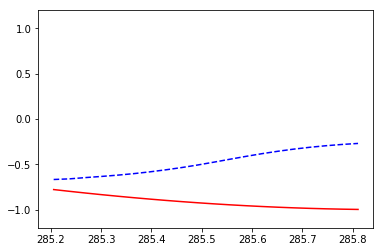

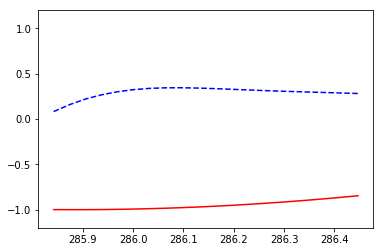

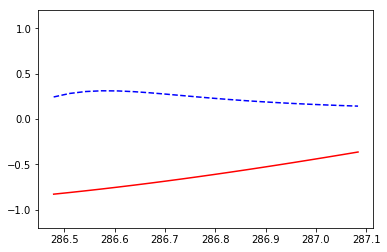

train cost:  0.33764


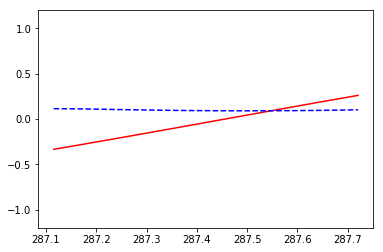

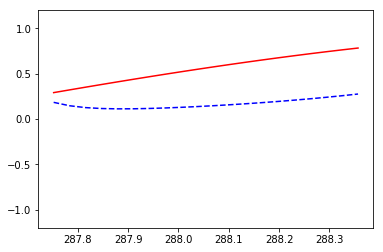

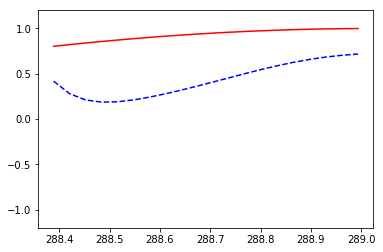

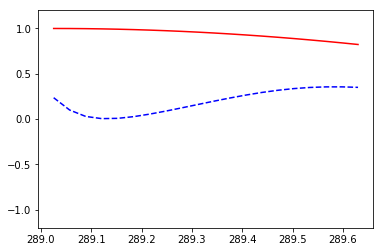

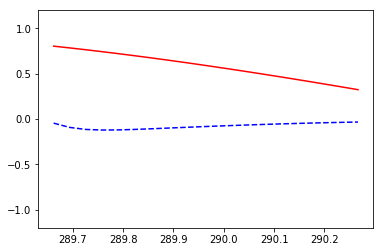

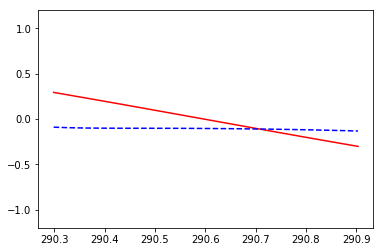

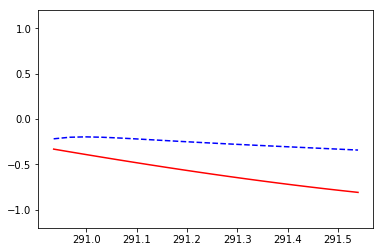

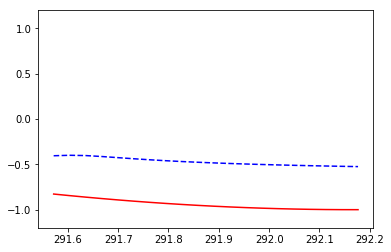

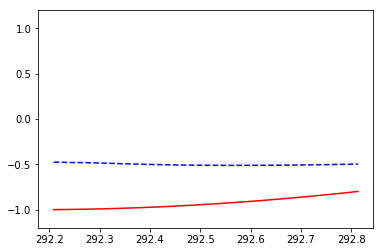

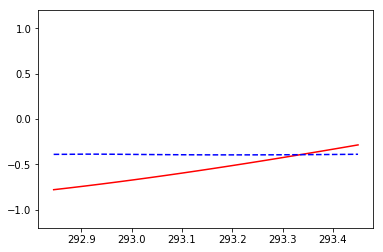

train cost:  0.089243


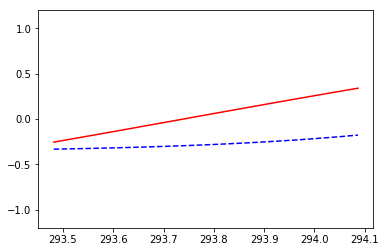

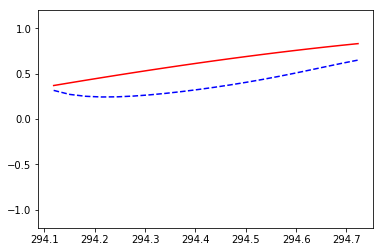

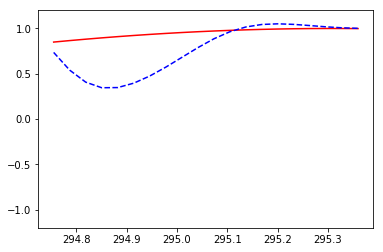

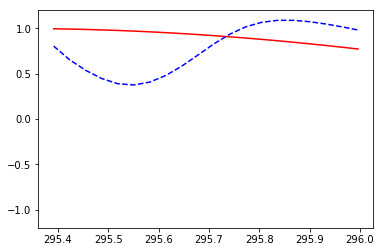

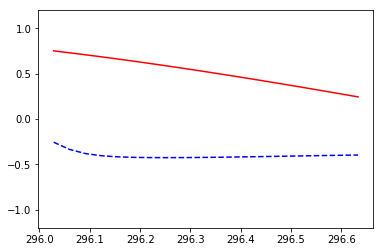

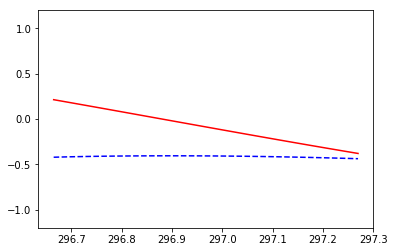

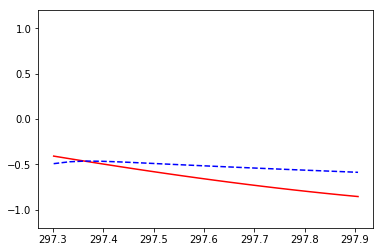

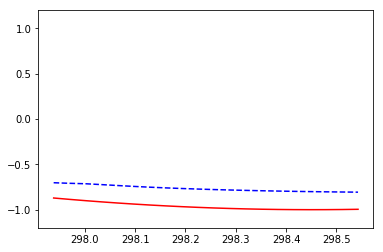

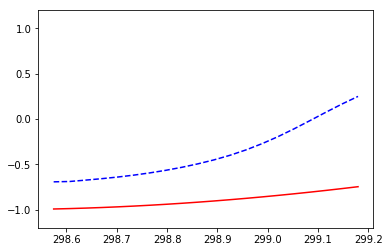

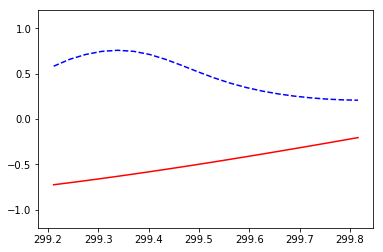

train cost:  0.141826


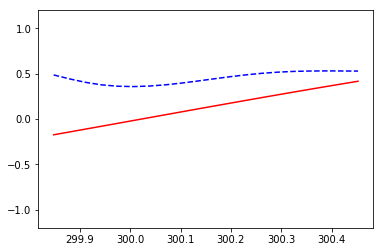

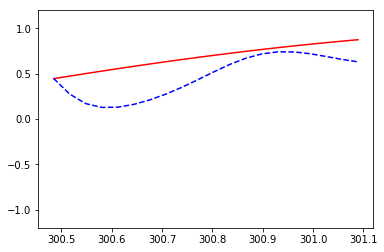

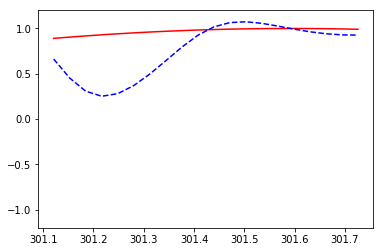

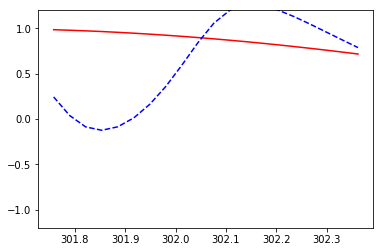

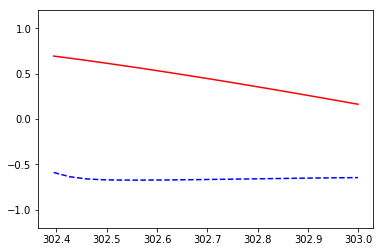

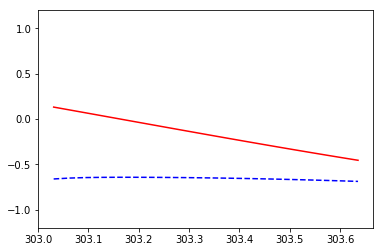

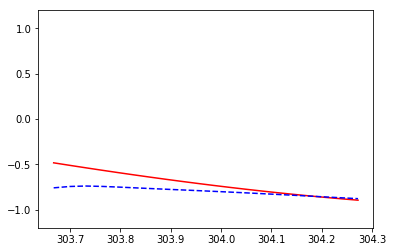

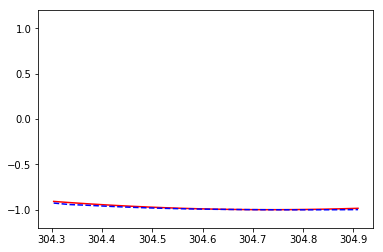

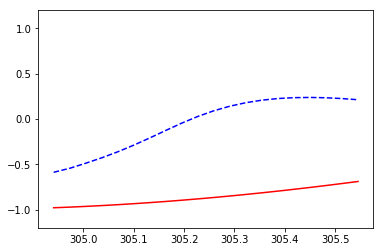

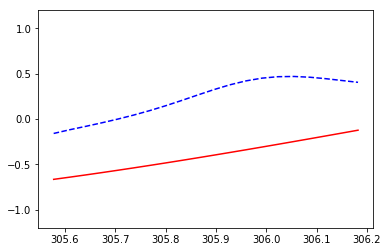

train cost:  0.0450543


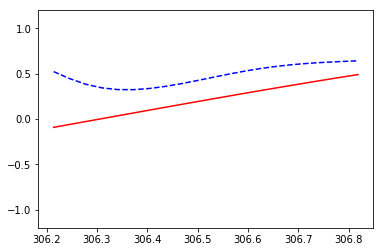

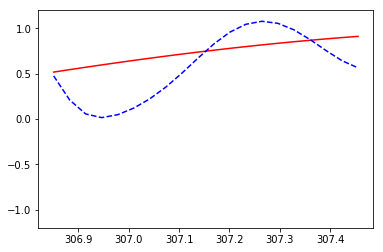

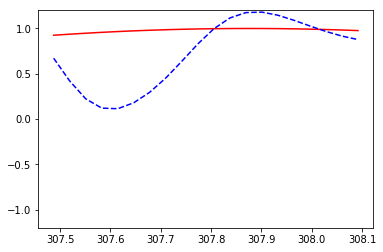

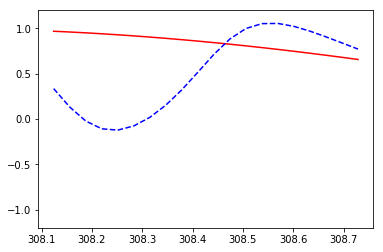

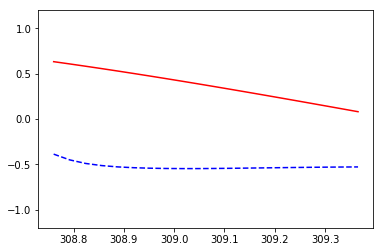

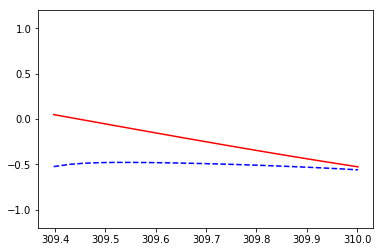

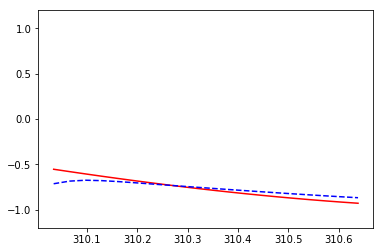

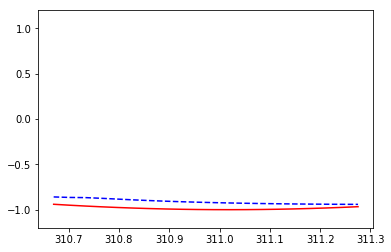

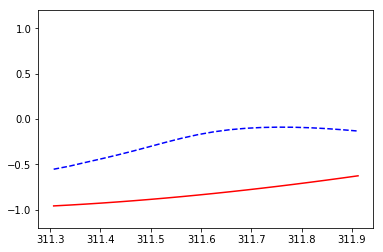

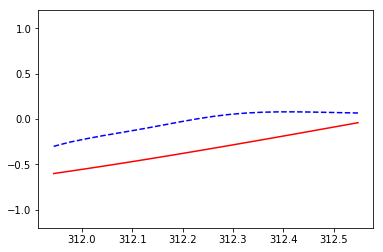

train cost:  0.236218


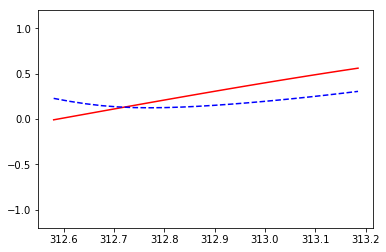

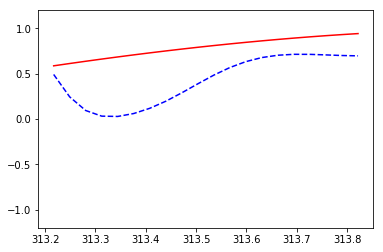

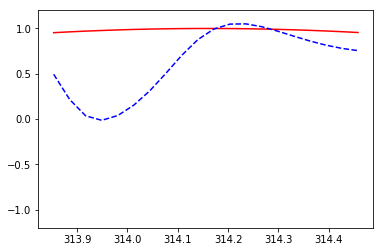

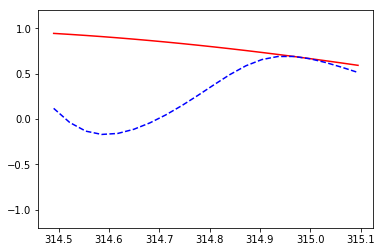

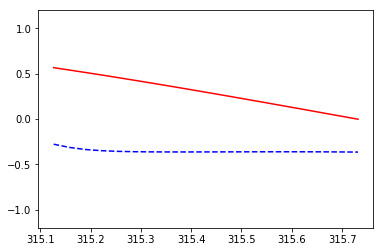

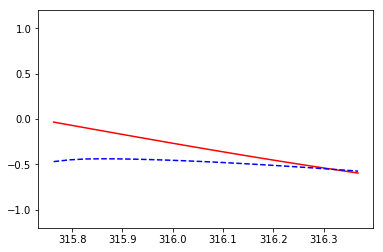

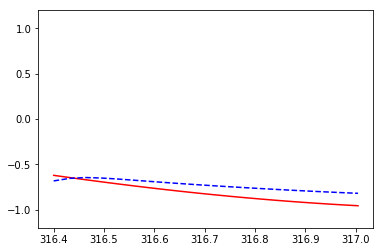

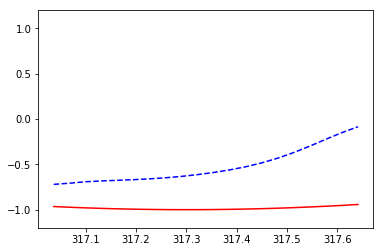

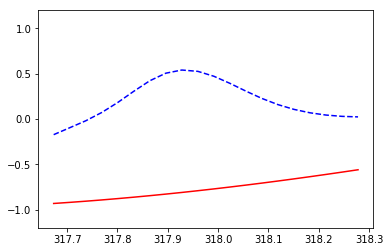

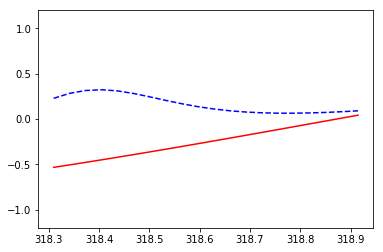

train cost:  0.0775966


In [26]:
#rnn regretion lstm
####still dont get it


# os.environ['KERAS_BACKEND']='tensorflow'
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam

BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 50
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20
LR = 0.006


def get_batch():
    global BATCH_START, TIME_STEPS
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START,
                   BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    # plt.plot(xs[0, :], res[0, :], 'r', xs[0, :], seq[0, :], 'b--')
    # plt.show()
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]

model = Sequential()
# build a LSTM RNN
model.add(LSTM(
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    output_dim=CELL_SIZE,
    return_sequences=True,      # True: output at all steps. False: output as last step.
    stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
))
# add output layer
model.add(TimeDistributed(Dense(OUTPUT_SIZE)))
adam = Adam(LR)
model.compile(optimizer=adam,
              loss='mse',)

print('Training ------------')
for step in range(501):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    plt.plot(xs[0, :], Y_batch[0].flatten(), 'r', xs[0, :], pred.flatten()[:TIME_STEPS], 'b--')
    plt.ylim((-1.2, 1.2))
    plt.draw()
    plt.pause(0.1)
    if step % 10 == 0:
        print('train cost: ', cost)








In [ ]:

import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(x_train, _), (x_test, y_test) = mnist.load_data()

# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

# in order to plot in a 2D figure
encoding_dim = 2

# this is our input placeholder
input_img = Input(shape=(784,))

# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

# construct the autoencoder model
autoencoder = Model(input=input_img, output=decoded)

# construct the encoder model for plotting
encoder = Model(input=input_img, output=encoder_output)

# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# training
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True)

# plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()



